# Extended Data Figures

# Extended Data Figure 1

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
import os
import functools
import upsetplot

warnings.filterwarnings('ignore')
plt.rc('font', family='Helvetica')

In [2]:
MBES = pd.read_csv('MBESv2_CORRECTED.csv')
MBES = MBES[MBES['Pool']!='F3-R3']

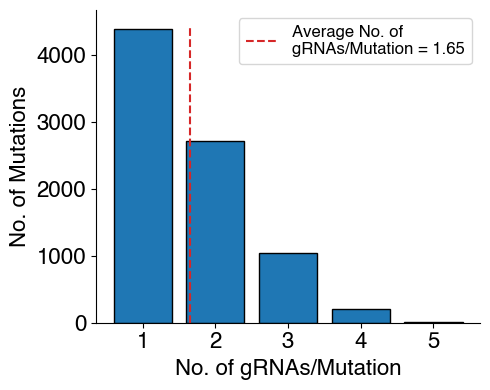

In [3]:
#plotting No. of gRNAs for each mutation
MBES_targ = MBES[MBES['classification']=='targeting guide']
ABE = MBES_targ[MBES_targ['Editor']=='ABE']
CBE = MBES_targ[MBES_targ['Editor']=='CBE']

u, c = np.unique(MBES_targ['mutation_idx'], return_counts=True)
u2, c2 = np.unique(c, return_counts=True)

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(u2, c2, linewidth=1, edgecolor='black')

ax.plot([np.average(c), np.average(c)], [0,4450], linestyle='dashed', color='tab:red', label=f'Average No. of\ngRNAs/Mutation = {np.round(np.average(c), 2)}')
ax.legend(fontsize=12)
ax.set_xticks([1,2,3,4,5])
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('No. of Mutations', fontsize=16)
ax.set_xlabel('No. of gRNAs/Mutation', fontsize=16)
fig.tight_layout()

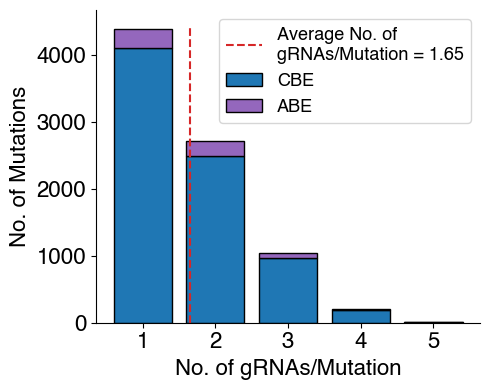

In [4]:
#plotting No. of gRNAs for each mutation
MBES_targ = MBES[MBES['classification']=='targeting guide']

ABE = MBES_targ[MBES_targ['Editor']=='ABE']
CBE = MBES_targ[MBES_targ['Editor']=='CBE']

u, c = np.unique(MBES_targ['mutation_idx'], return_counts=True)
u2, c2 = np.unique(c, return_counts=True)

u11, c11 = np.unique(CBE['mutation_idx'], return_counts=True)
u22, c22 = np.unique(c11, return_counts=True)

u111, c111 = np.unique(ABE['mutation_idx'], return_counts=True)
u222, c222 = np.unique(c111, return_counts=True)

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(u22, c22, linewidth=1, edgecolor='black', color='tab:blue', label='CBE')
ax.bar(u222, c222, linewidth=1, bottom = c22, edgecolor='black', color='tab:purple', label='ABE')

ax.plot([np.average(c), np.average(c)], [0,4450], linestyle='dashed', color='tab:red', label=f'Average No. of\ngRNAs/Mutation = {np.round(np.average(c), 2)}')
ax.legend(fontsize=13)
ax.set_xticks([1,2,3,4,5])
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('No. of Mutations', fontsize=16)
ax.set_xlabel('No. of gRNAs/Mutation', fontsize=16)
fig.tight_layout()
#fig.savefig('figures/extended_1c.pdf')

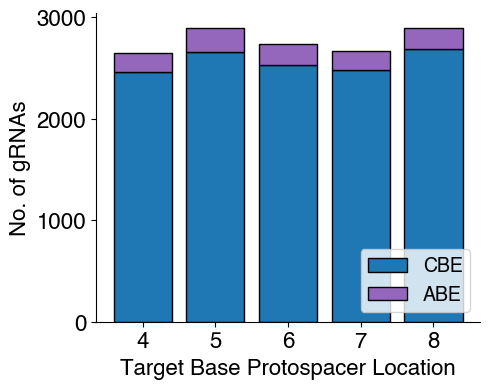

In [6]:
ABE = MBES_targ[MBES_targ['Editor']=='ABE']
CBE = MBES_targ[MBES_targ['Editor']=='CBE']

u, c = np.unique(CBE['Protospacer_Location'], return_counts=True)
u1,c1 = np.unique(ABE['Protospacer_Location'], return_counts=True)

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(u, c, linewidth=1, edgecolor='black', color='tab:blue', label='CBE')
ax.bar(u1, c1, bottom = c, linewidth=1, edgecolor='black', color='tab:purple', label='ABE')
ax.legend(fontsize=14, loc='lower right')
ax.set_xticks([4,5,6,7,8])
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('No. of gRNAs', fontsize=16)
ax.set_xlabel('Target Base Protospacer Location', fontsize=16)
fig.tight_layout()
#fig.savefig('figures/extended_1b.pdf')

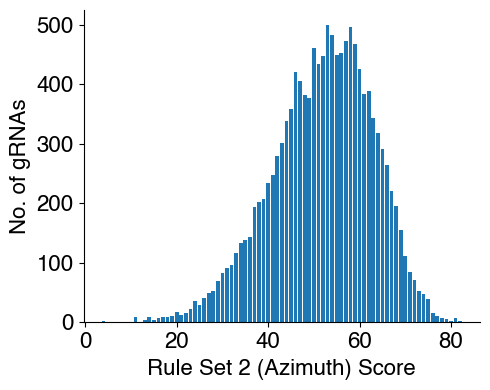

In [7]:
MBES_non_leg = MBES_targ[MBES_targ['legacy']==False]

u, c = np.unique(MBES_non_leg['OnTarget_Azimuth_Score'], return_counts=True)

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(u, c, linewidth=0)
#ax.set_xticks([4,5,6,7,8])
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('No. of gRNAs', fontsize=16)
ax.set_xlabel('Rule Set 2 (Azimuth) Score', fontsize=16)
fig.tight_layout()
#fig.savefig('figures/extended_1d.pdf')

In [8]:
#include a histogram of the flank sizes as well
MBES = pd.read_csv('MBESv2_CORRECTED.csv')

input_data = pd.read_csv('source_data/msk_BE_pts_over_2_v2.csv')
input_data2 = pd.read_csv('source_data/input_MSK_over_2.csv')

muts_aacr = pd.read_csv('/Users/samgould/Desktop/FSR Lab/reference files/AACR_genie/data_mutations_extended.txt', sep='\t')
msk_aacr = muts_aacr[(muts_aacr['Center']=='MSK') & (muts_aacr['Variant_Type']=='SNP')]


In [9]:
df_mutation = pd.read_csv('/Users/samgould/Desktop/AACR_v13.1/data_mutations_extended.txt', header=0, sep='\t', comment="#", na_values = 'Not Applicable')

# only keep MSK data
df_mutation = df_mutation.iloc[:,[0, 37,2, 5,6,9,10,11,13,16]].reset_index(drop=True)
df_mutation = df_mutation[df_mutation['Center']=='MSK'].reset_index(drop=True)
df_mutation = df_mutation[df_mutation['Variant_Type'] == 'SNP'].reset_index(drop=True)
df_mutation = df_mutation.dropna(subset='HGVSc').reset_index(drop=True)
df_mutation['HGVSc'] = [x.split(':')[0] for x in df_mutation['HGVSc']]
df_mutation = df_mutation.drop_duplicates().reset_index(drop=True)

#and count tumor samples for a given mutation (by HGVSc)
df_mutation_count = df_mutation.groupby([df_mutation.columns.tolist()[x] for x in [0,1,3,4,5,6,7,8]], as_index = False).size()
df_mutation_count_sorted = df_mutation_count.sort_values(by = 'size')
df_mutation_count_sorted.columns =['gene_name_h', 'tx_id_h','start_h','end_h','class_h','type_h','ref_seq_h','alt_seq_h','count']

In [10]:
mutations_over_2 = df_mutation_count_sorted[df_mutation_count_sorted['count']>2].reset_index(drop=True)

alteration = []
for i, val in mutations_over_2.iterrows():
    ref = val['ref_seq_h']
    alt = val['alt_seq_h']
    alteration.append(f'{ref}>{alt}')

mutations_over_2['alteration'] = alteration

mutations_over_2_BE_amenable = mutations_over_2[mutations_over_2['alteration'].isin(['C>T', 'G>A', 'A>G', 'T>C'])]

In [11]:
h2m = pd.read_csv('/Users/samgould/Desktop/h2m_misc/H2M_v1_corrected.csv')
h2m_subset = h2m[(h2m['gene_name_h'].isin(list(np.unique(mutations_over_2['gene_name_h']))))].reset_index(drop=True)

identifier = []
for i, val in mutations_over_2.iterrows():
    a = val['gene_name_h']
    b = val['start_h']
    c = val['ref_seq_h']
    d = val['alt_seq_h']
    identifier.append(f'{a}_{b}_{c}_{d}')

mutations_over_2['identifier'] = identifier

identifier2 = []
for i, val in h2m_subset.iterrows():
    a = val['gene_name_h']
    b = val['start_h']
    c = val['ref_seq_h']
    d = val['alt_seq_h']
    identifier2.append(f'{a}_{b}_{c}_{d}')

h2m_subset['identifier'] = identifier2

In [12]:
h2m_subset_MSK = h2m_subset[h2m_subset['identifier'].isin(identifier)].drop_duplicates(subset='identifier').reset_index(drop=True)
h2m_subset_MSK

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,Database,ID_db,pe_human,pe_mouse,be_human,be_mouse,expanded,flank_size,unique_id,identifier
0,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11,+,True,133760790,133760790,C,...,AACR,NaN,False,False,False,False,False,64,24505_v,ABL1_133760790_C_T
1,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11,+,True,133760714,133760714,C,...,AACR,NaN,False,False,False,False,False,23,24507_v,ABL1_133760714_C_T
2,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11,+,True,133759967,133759967,C,...,AACR,NaN,False,False,False,False,False,20,24508_v,ABL1_133759967_C_T
3,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11,+,True,133753910,133753910,G,...,AACR,NaN,False,False,False,False,False,175,24509_v,ABL1_133753910_G_A
4,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11,+,True,133738360,133738360,G,...,AACR,NaN,False,False,False,False,False,109,24511_v,ABL1_133738360_G_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24876,ZRSR2,ENSG00000169249.8,ENST00000307771.7,chrX,11,+,True,15841258,15841258,C,...,AACR,NaN,False,False,False,False,False,9,3908433_v,ZRSR2_15841258_C_T
24877,ZRSR2,ENSG00000169249.8,ENST00000307771.7,chrX,11,+,True,15841301,15841301,G,...,AACR,NaN,False,False,False,False,False,5,3908435_v,ZRSR2_15841301_G_A
24878,ZRSR2,ENSG00000169249.8,ENST00000307771.7,chrX,11,+,True,15836766,15836766,G,...,AACR,NaN,False,False,False,False,False,1,3908634_v,ZRSR2_15836766_G_A
24879,ZRSR2,ENSG00000169249.8,ENST00000307771.7,chrX,11,+,True,15840928,15840928,G,...,AACR,NaN,False,False,False,False,False,0,3908760_v,ZRSR2_15840928_G_C


In [13]:
sub3 = h2m_subset_MSK[h2m_subset_MSK['statement'].isin(['Class 0: This mutation can be originally modeled.',
       'Class 1: This mutation can be alternatively modeled.',
       'Class 2: This mutation can be modeled, but the effect may not be consistent.',
       'Class 4: Mutated sequences are not identical.'])]

alt2 = []
for i, val in sub3.iterrows():
    r = val['ref_seq_m']
    a = val['alt_seq_m']
    alt2.append(f'{r}>{a}')

sub3['alteration'] = alt2
sub4 = sub3[sub3['alteration'].isin(['C>T', 'G>A', 'A>G', 'T>C'])]

sub4['fs_right'] = [int(i[:-2]) for i in sub4['flank_size_right']]
sub4['fs_left'] = [int(i[:-2]) for i in sub4['flank_size_left']]

flank2 = sub4[(sub4['fs_right']>=2) & (sub4['fs_left']>=2)]

In [14]:
identifier3 = []
for i, val in input_data.iterrows():
    a = val['gene_name_h']
    b = int(val['start_h'])
    c = val['ref_seq_h']
    d = val['alt_seq_h']
    identifier3.append(f'{a}_{b}_{c}_{d}')

input_data['identifier']=identifier3

MBES_subset = MBES[(MBES['legacy']==False) & (MBES['classification']=='targeting guide')]

identifier4 = []
for i, val in MBES_subset.iterrows():
    a = val['gene_name_h']
    b = int(val['start_h'])
    c = val['ref_seq_h']
    d = val['alt_seq_h']
    identifier4.append(f'{a}_{b}_{c}_{d}')

MBES_subset['identifier']=identifier4
MBES_subset_no_dups = MBES_subset[['gene_name_m', 'start_m', 'end_m', 'ref_seq_m', 'alt_seq_m', 'identifier']].drop_duplicates()

MBES_subset_no_dups

,gene_name_m,start_m,end_m,ref_seq_m,alt_seq_m,identifier
0,Abl1,31668930.0,31668930.0,A,G,ABL1_133730186_A_G
3,Abl1,31691660.0,31691660.0,G,A,ABL1_133760819_G_A
5,Abl1,31690415.0,31690415.0,G,A,ABL1_133759553_G_A
7,Abl1,31684662.0,31684662.0,G,A,ABL1_133753910_G_A
8,Abl1,31674684.0,31674684.0,C,T,ABL1_133738315_C_T
...,...,...,...,...,...,...
13249,Zfhx3,109519960.0,109519960.0,G,A,ZFHX3_72992964_C_T
13250,Zfhx3,109519589.0,109519589.0,G,A,ZFHX3_72993335_C_T
13253,Zfhx3,109660257.0,109660257.0,C,T,ZFHX3_72845844_G_A
13254,Zfhx3,109519588.0,109519588.0,C,T,ZFHX3_72993336_G_A


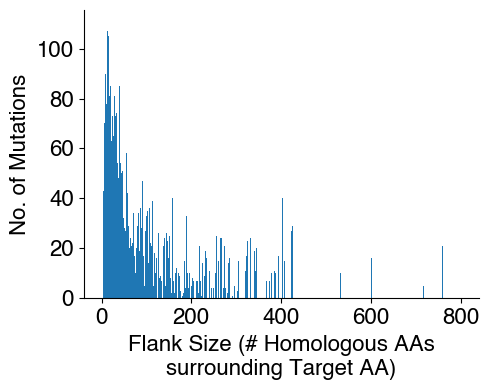

In [15]:
flank_merge = pd.merge(flank2, MBES_subset_no_dups, on='identifier')
flank_merge[flank_merge['classification_h'].isin(['Missense', 'Nonsense'])]
np.unique(flank_merge['flank_size'], return_counts=True)


fig, ax = plt.subplots(figsize=(5,4))

ax.hist(flank_merge['flank_size'], bins = np.linspace(0,800, 801))

ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('No. of Mutations', fontsize=16)
ax.set_xlabel('Flank Size (# Homologous AAs\nsurrounding Target AA)', fontsize=16)
fig.tight_layout()
#fig.savefig('figures/extended_1a.pdf')


In [16]:
#ABE_controls = pd.DataFrame(dict(zip(['NT', 'ST'], [10,26])))
ABE_controls = pd.DataFrame(dict(zip(['u','c'], [['NT', 'ST'],[10, 26]])))
CBE_controls = pd.DataFrame(dict(zip(['u','c'], [['NT', 'ST'],[123, 313]])))

ABE_u, ABE_c = ['Missense', 'Splice/Intron', 'Nonstop'], [980, 53, 1]
CBE_u, CBE_c = ['Missense', 'Splice/Intron', 'Nonsense'], [10373+418, 177+33, 1675+130]

ABE_df = pd.DataFrame(dict(zip(['u', 'c'], [ABE_u,ABE_c])))
CBE_df = pd.DataFrame(dict(zip(['u', 'c'], [CBE_u,CBE_c])))

ABE_final = pd.concat((ABE_df, ABE_controls))
CBE_final = pd.concat((CBE_df, CBE_controls))

print(len(MBES[MBES['Editor']=='ABE']))
print(sum(ABE_final['c']))
print(len(MBES[MBES['Editor']=='CBE']))
print(sum(CBE_final['c']))


1070
1070
13242
13242


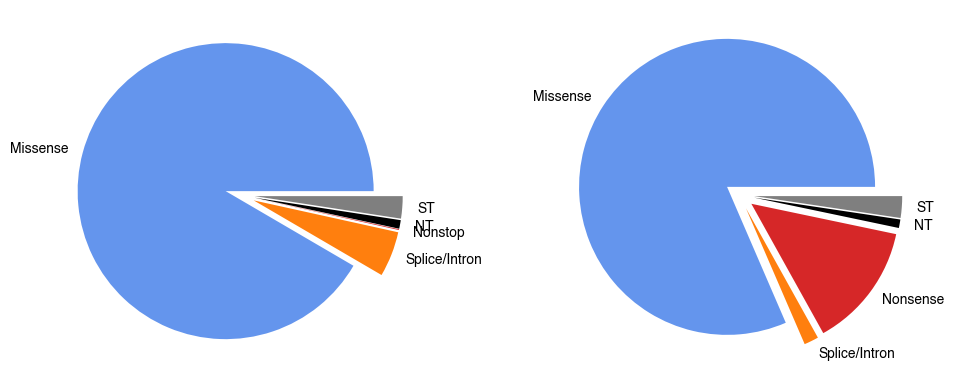

In [17]:

fig, ax = plt.subplots(1,2,figsize=(10,4))


colors1=['cornflowerblue', 'tab:orange', 'tab:red', 'black', 'tab:grey']
colors2=['cornflowerblue', 'tab:orange', 'tab:red', 'black', 'tab:grey']

ax[0].pie(ABE_final['c'], explode=[.1]*len(ABE_final),labels=ABE_final['u'], colors=colors1)
ax[1].pie(CBE_final['c'], explode=[.1]*len(CBE_final),labels=CBE_final['u'], colors=colors2)

fig.tight_layout()
#fig.savefig('figures/extended_1ef.pdf')

# Extended Data Figure 4

In [3]:
samp_CBE = ['D24-12799-6840R_guide_split_BARCODES',
 'D24-12800-6840R_guide_split_BARCODES',
 'D24-12801-6840R_guide_split_BARCODES',
 'D24-12802-6840R_guide_split_BARCODES',
 'D24-12803-6840R_guide_split_BARCODES',
 'D24-12804-6840R_guide_split_BARCODES',
 'D24-12805-6840R_guide_split_BARCODES',
 'D24-12806-6840R_guide_split_BARCODES',
 'D24-12807-6840R_guide_split_BARCODES',
 'D24-12808-6840R_guide_split_BARCODES',
 'D24-12809-6840R_guide_split_BARCODES',
 'D24-12810-6840R_guide_split_BARCODES',
 'D24-12811-6840R_guide_split_BARCODES',
 'D24-12812-6840R_guide_split_BARCODES',
 'D24-12813-6840R_guide_split_BARCODES',
 'D24-12814-6840R_guide_split_BARCODES',
 'D24-12815-6840R_guide_split_BARCODES',
 'D24-12816-6840R_guide_split_BARCODES',
 'D24-12817-6840R_guide_split_BARCODES',
 'D24-12818-6840R_guide_split_BARCODES',
 'D24-12819-6840R_guide_split_BARCODES',
 'D24-12820-6840R_guide_split_BARCODES',
 'D24-12821-6840R_guide_split_BARCODES',
 'D24-12822-6840R_guide_split_BARCODES',
 'D24-12823-6840R_guide_split_BARCODES',
 'D24-12824-6840R_guide_split_BARCODES',
 'D24-12825-6840R_guide_split_BARCODES',
 'D24-12826-6840R_guide_split_BARCODES',
 'D24-12827-6840R_guide_split_BARCODES',
 'D24-12828-6840R_guide_split_BARCODES',
 'D24-12829-6840R_guide_split_BARCODES',
 'D24-12830-6840R_guide_split_BARCODES',
 'D24-12831-6840R_guide_split_BARCODES',
 'D24-12832-6840R_guide_split_BARCODES',
 'D24-12833-6840R_guide_split_BARCODES',
 'D24-12834-6840R_guide_split_BARCODES',
 'D24-12835-6840R_guide_split_BARCODES',
 'D24-12836-6840R_guide_split_BARCODES',
 'D24-12837-6840R_guide_split_BARCODES']

sample_id_CBE = ['spleen1', 'spleen2','spleen3','spleen4','spleen5', 'spleen6', 'spleen7', 'spleen8', 'spleen9', 'bonemarrow1','bonemarrow2','bonemarrow3',
            'bonemarrow4','bonemarrow5', 'bonemarrow6','bonemarrow7','bonemarrow8', 'bonemarrow9',
             'bonemarrow10','meninges1','meninges2','meninges3','meninges4','meninges5', 'meninges6', 'meninges7',
             'meninges8', 'meninges9', 'meninges10',
            'input_rep1', 'input_rep2', 'input_rep3', 'd5_rep1', 'd5_rep2', 'd5_rep3', 'd15_rep1',
            'd15_rep2', 'd15_rep3', 'plasmidlib']


samp_ABE = ['D24-12774-6848T_guide_split_BARCODES',
 'D24-12775-6848T_guide_split_BARCODES',
 'D24-12776-6848T_guide_split_BARCODES',
 'D24-12777-6848T_guide_split_BARCODES',
 'D24-12778-6848T_guide_split_BARCODES',
 'D24-12779-6848T_guide_split_BARCODES',
 'D24-12780-6848T_guide_split_BARCODES',
 'D24-12781-6848T_guide_split_BARCODES',
 'D24-12782-6848T_guide_split_BARCODES',
 'D24-12783-6848T_guide_split_BARCODES',
 'D24-12784-6848T_guide_split_BARCODES',
 'D24-12785-6848T_guide_split_BARCODES',
 'D24-12786-6848T_guide_split_BARCODES',
 'D24-12787-6848T_guide_split_BARCODES',
 'D24-12788-6848T_guide_split_BARCODES',
 'D24-12789-6848T_guide_split_BARCODES',
 'D24-12790-6848T_guide_split_BARCODES',
 'D24-12791-6848T_guide_split_BARCODES',
 'D24-12792-6848T_guide_split_BARCODES',
 'D24-12793-6848T_guide_split_BARCODES',
 'D24-12794-6848T_guide_split_BARCODES',
 'D24-12795-6848T_guide_split_BARCODES',
 'D24-12796-6848T_guide_split_BARCODES',
 'D24-12797-6848T_guide_split_BARCODES',
 'D24-12798-6848T_guide_split_BARCODES',]

sample_id_ABE = ['spleen1', 'spleen2','spleen3','spleen4','spleen5', 'bonemarrow1','bonemarrow2','bonemarrow3',
            'bonemarrow4','bonemarrow5','meninges1','meninges2','meninges3','meninges4','meninges5',
            'input_rep1', 'input_rep2', 'input_rep3', 'd5_rep1', 'd5_rep2', 'd5_rep3', 'd15_rep1',
            'd15_rep2', 'd15_rep3', 'plasmidlib']


ABE_samples = pd.DataFrame(dict(zip(['file_name', 'sample'], [samp_ABE, sample_id_ABE])))
CBE_samples = pd.DataFrame(dict(zip(['file_name', 'sample'], [samp_CBE, sample_id_CBE])))

ABE_samp_dict = dict(zip(samp_ABE, sample_id_ABE))
CBE_samp_dict = dict(zip(samp_CBE, sample_id_CBE))

In [4]:
#ABE
df_holder_counts_ABE = []
for key in ABE_samp_dict.keys():

    gg = pd.read_csv(f'240807Hem_ABE/counts/{key}_count_df.csv')
    df_holder_counts_ABE.append(gg)

count_dict_ABE = dict(zip(ABE_samp_dict.values(), df_holder_counts_ABE))

#CBE
df_holder_counts_CBE = []
for key in CBE_samp_dict.keys():

    gg = pd.read_csv(f'240807HemA_CBE/counts/{key}_count_df.csv')
    df_holder_counts_CBE.append(gg)

count_dict_CBE = dict(zip(CBE_samp_dict.values(), df_holder_counts_CBE))

MBES = pd.read_csv('MBESv2_CORRECTED.csv')
MBES = MBES.rename(columns = {'gRNA_id':'Guide_ID'})
ABE_pool_guides = list(MBES[MBES['Pool']=='F1-R1']['Guide_ID'])
CBE_pool_guides = list(MBES[MBES['Pool']=='F2-R2']['Guide_ID'])


names = []
bc_count = []
guide_count = []
#guide_id = []
guide_id_cbe = []
for i in list(count_dict_CBE.keys()):


    names.append(i)
    d = count_dict_CBE[i]
    d = d[d['Guide_ID'].isin(CBE_pool_guides)]

    bc_count.append(list(d['bc_count']))
    
    guide_count.append(list(d['matched_guide_count']))
    guide_id_cbe.append(list(d['Guide_ID']))

bc_df_cbe = pd.DataFrame(dict(zip(names, bc_count)))
guide_df_cbe = pd.DataFrame(dict(zip(names, guide_count)))


names = []
bc_count = []
guide_count = []
guide_id_abe = []
for i in list(count_dict_ABE.keys()):

    if i=='spleen5':
        continue
    else:
        names.append(i)
        d = count_dict_ABE[i]
        d = d[d['Guide_ID'].isin(ABE_pool_guides)]

        bc_count.append(list(d['bc_count']))
        guide_count.append(list(d['matched_guide_count']))
        guide_id_abe.append(list(d['Guide_ID']))

bc_df_abe = pd.DataFrame(dict(zip(names, bc_count)))
guide_df_abe = pd.DataFrame(dict(zip(names, guide_count)))

In [5]:
bc_df_cbe_normed = bc_df_cbe.copy()
bc_df_abe_normed = bc_df_abe.copy()

for i, val in enumerate(list(bc_df_cbe_normed.columns)):

    sum1 = sum(bc_df_cbe_normed[val])
    bc_df_cbe_normed[val] = 100*(bc_df_cbe_normed[val]/sum1)


for i, val in enumerate(list(bc_df_abe_normed.columns)):

    sum1 = sum(bc_df_abe_normed[val])
    bc_df_abe_normed[val] = 100*(bc_df_abe_normed[val]/sum1)

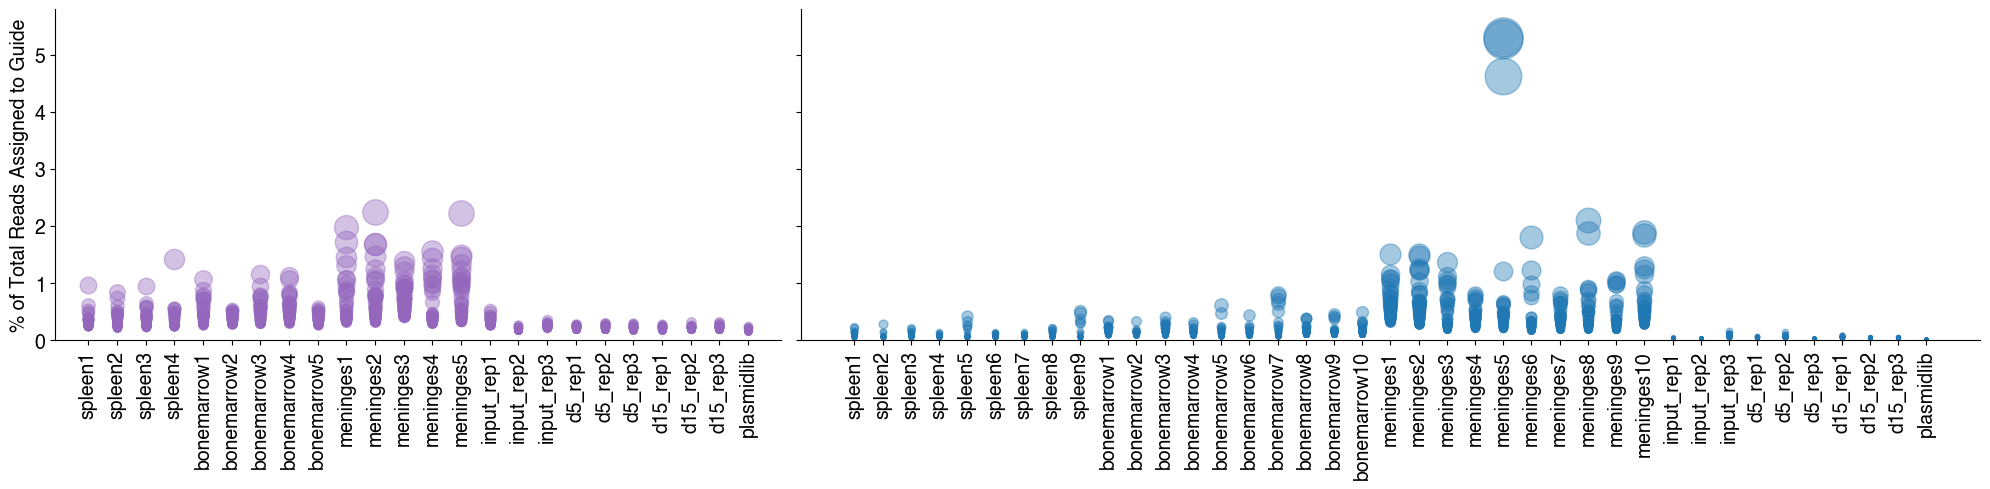

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,5), sharey=True, width_ratios=[len(bc_df_abe_normed.columns), len(bc_df_cbe_normed.columns)])
for i, val in enumerate(list(bc_df_abe_normed.columns)):
    top_hits = sorted(bc_df_abe_normed[val])[::-1]
    to_plot = top_hits[:50]

    for j in to_plot:
        ax[0].scatter([i], [j], s=j*150, color='tab:purple', alpha=.4)

ax[0].set_xticks(range(len(bc_df_abe_normed.columns)));
ax[0].set_xticklabels(bc_df_abe_normed.columns, rotation=90);

for i, val in enumerate(list(bc_df_cbe_normed.columns)):
    top_hits = sorted(bc_df_cbe_normed[val])[::-1]
    to_plot = top_hits[:50]

    for j in to_plot:
        ax[1].scatter([i], [j], s=j*150, color='tab:blue', alpha=.4)

ax[1].set_xticks(range(len(bc_df_cbe_normed.columns)));
ax[1].set_xticklabels(bc_df_cbe_normed.columns, rotation=90);


ax[0].set_ylabel('% of Total Reads Assigned to Guide', fontsize=14)
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=14,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=14,)
ax[0].set_ylim(0,5.8)
fig.tight_layout()
#fig.savefig('figures/extended_3cd.pdf')

In [7]:
a = list(bc_df_cbe_normed.columns)

n = ['S REP1', 'S REP2', 'S REP3', 'S REP4', 'S REP5', 'S REP6',
'S REP7', 'S REP8', 'S REP9', 'B REP1', 'B REP2',
'B REP3', 'B REP4', 'B REP5', 'B REP6',
'B REP7', 'B REP8', 'B REP9', 'B REP10',
'M REP1', 'M REP2', 'M REP3', 'M REP4', 'M REP5',
'M REP6', 'M REP7', 'M REP8', 'M REP9', 'M REP10',
'INPUT REP1', 'INPUT REP2', 'INPUT REP3', 'D5 REP1', 'D5 REP2',
'D5 REP3', 'D15 REP1', 'D15 REP2', 'D15 REP3', 'PLASMID']

name_dict = dict(zip(a,n))

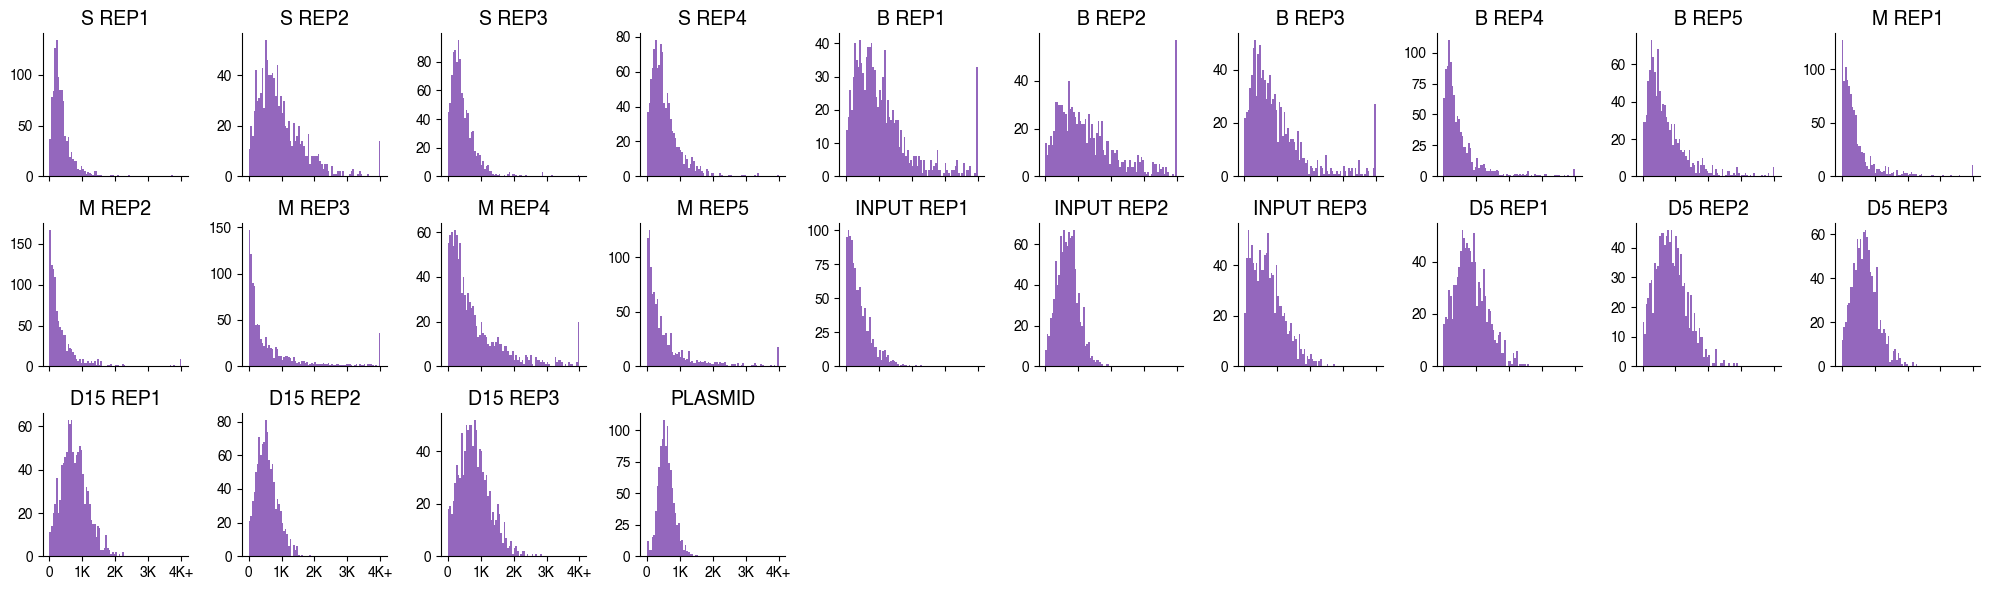

In [8]:
fig, ax = plt.subplots(3,10,figsize=(20,6), sharey=False, sharex=True)

for i in range(3):
    for k in range(10):
        num_samp = (i*10)+k
        #print(num_samp)
        if num_samp<len(bc_df_abe.columns):
            samp = list(bc_df_abe.columns)[num_samp]
            bins=np.linspace(0,4000, 81)
            ax[i][k].hist(np.clip(bc_df_abe[samp], bins[0], bins[-1]), bins=bins,color='tab:purple', edgecolor='black', linewidth=0, density=False)
            ax[i][k].set_title(name_dict[samp], fontsize=14)
            ax[i][k].spines[['top', 'right']].set_visible(False)
            ax[i][k].set_xticks([0,1000,2000,3000,4000])
            ax[i][k].set_xticklabels(['0','1K','2K','3K','4K+'])
            #ax.hist[]

for i in range(4,10):
    fig.delaxes(ax[2][i])

fig.tight_layout()
#fig.savefig('figures/extended_3a.pdf')

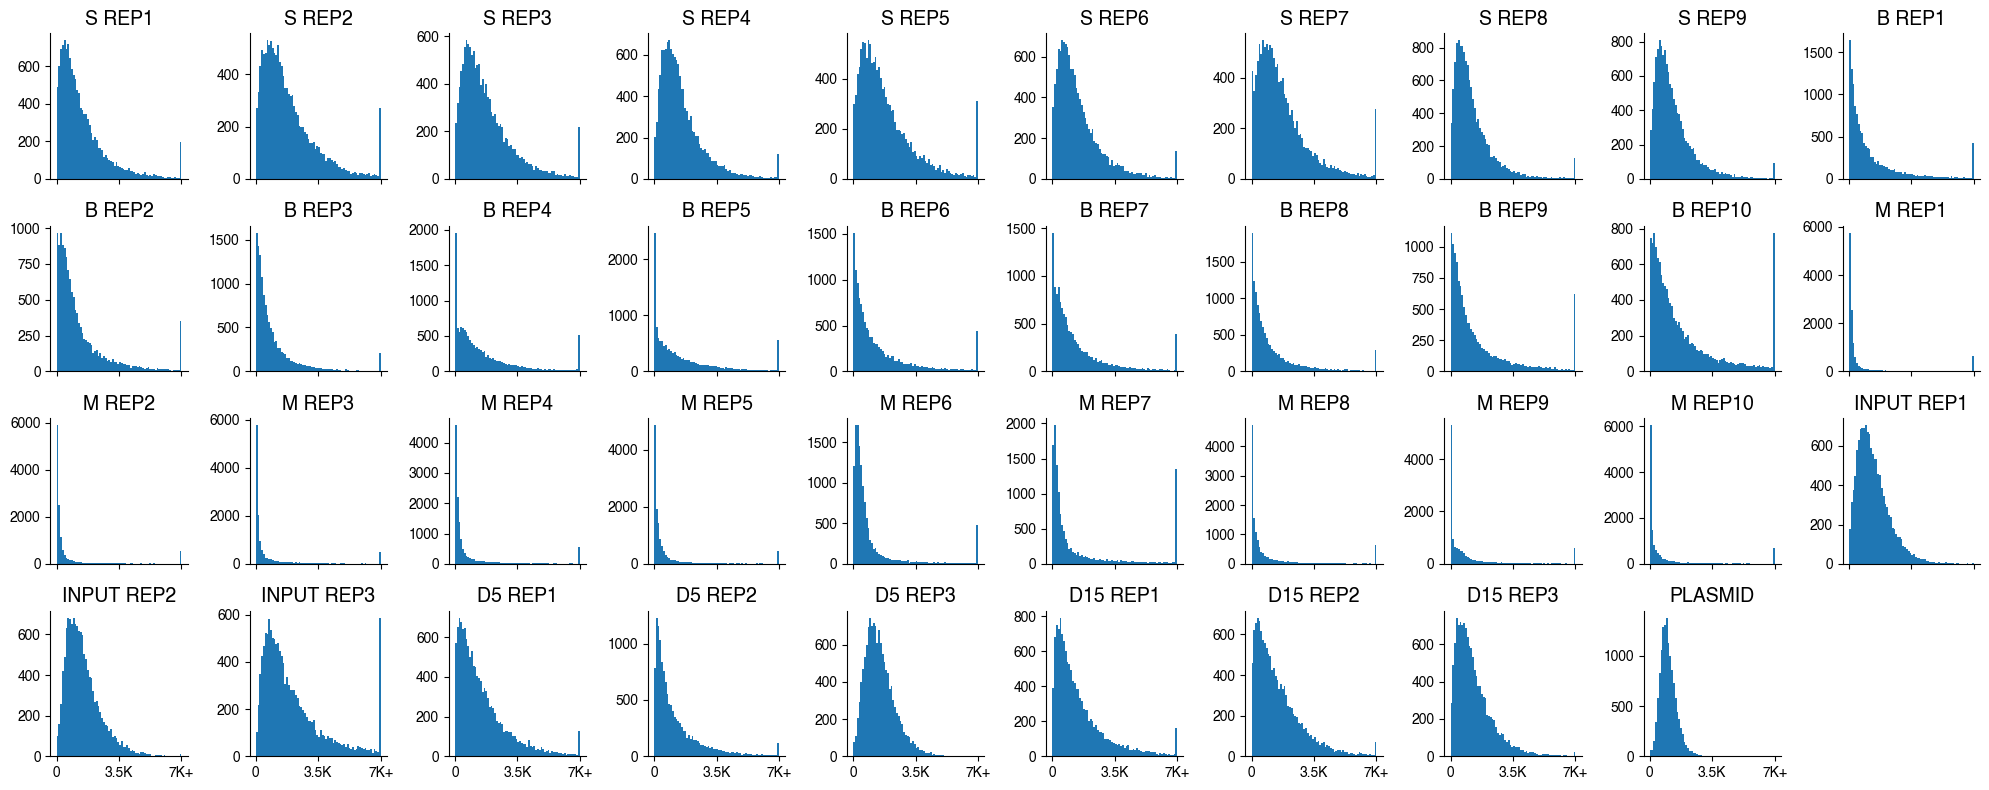

In [9]:
fig, ax = plt.subplots(4,10,figsize=(20,8), sharey=False, sharex=True)

for i in range(4):
    for k in range(10):
        num_samp = (i*10)+k
        #print(num_samp)
        if num_samp<len(bc_df_cbe.columns):
            samp = list(bc_df_cbe.columns)[num_samp]
            bins=np.linspace(0,7000, 71)
            ax[i][k].hist(np.clip(bc_df_cbe[samp], bins[0], bins[-1]), bins=bins,edgecolor='black', linewidth=0, density=False)
            ax[i][k].set_title(name_dict[samp], fontsize=14)
            ax[i][k].spines[['top', 'right']].set_visible(False)
            ax[i][k].set_xticks([0,3500,7000])
            ax[i][k].set_xticklabels(['0','3.5K','7K+'])
            #ax.hist[]

fig.delaxes(ax[3][9])

fig.tight_layout()
#fig.savefig('figures/extended_3b.pdf')

## Gini Coefficient

In [114]:
ABE_counts = pd.read_csv('mageck/ABE_bc_counts.txt', sep='\t')
CBE_counts = pd.read_csv('mageck/CBE_bc_counts.txt', sep='\t')

CBE_samp_dict = {'spleen':['spleen1','spleen2','spleen3','spleen4','spleen5','spleen6','spleen7','spleen8','spleen9'],
'bonemarrow':['bonemarrow1','bonemarrow2','bonemarrow3','bonemarrow4','bonemarrow5','bonemarrow6','bonemarrow7','bonemarrow8','bonemarrow9','bonemarrow10'],
'meninges':['meninges1','meninges2','meninges3','meninges4','meninges5','meninges6','meninges7','meninges8','meninges9','meninges10',],
'd5':['d5_rep1','d5_rep2','d5_rep3'],
'd15':['d15_rep1','d15_rep2','d15_rep3'],
'plasmid_lib':['plasmidlib']}

ABE_samp_dict = {'spleen':['spleen1','spleen2','spleen3','spleen4'],
'bonemarrow':['bonemarrow1','bonemarrow2','bonemarrow3','bonemarrow4','bonemarrow5'],
'meninges':['meninges1','meninges2','meninges3','meninges4','meninges5'],
'd5':['d5_rep1','d5_rep2','d5_rep3'],
'd15':['d15_rep1','d15_rep2','d15_rep3'],
'plasmid_lib':['plasmidlib']}

In [113]:
def gini(x):
    #SOURCE: https://stackoverflow.com/questions/39512260/calculating-gini-coefficient-in-python-numpy
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [118]:
CBE_samps = list(CBE_counts.columns[2:])
ABE_samps = list(ABE_counts.columns[2:])

CBE_skew = []
ABE_skew = []
for i in CBE_samps:
    d = sorted(np.asarray(CBE_counts[i]))
    g = gini(d)
    CBE_skew.append(g)

for i in ABE_samps:
    d = sorted(np.asarray(ABE_counts[i]))
    g = gini(d)
    ABE_skew.append(g)

CBE_skew_df = pd.DataFrame(dict(zip(['Sample', 'Gini Coefficient'], [CBE_samps, CBE_skew])))
ABE_skew_df = pd.DataFrame(dict(zip(['Sample', 'Gini Coefficient'], [ABE_samps, ABE_skew])))


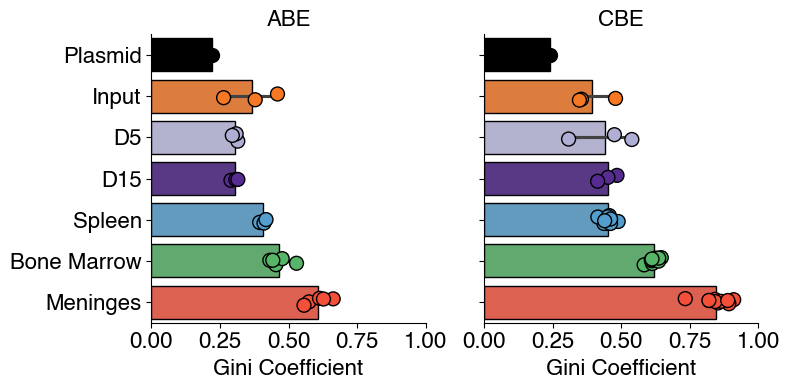

In [123]:
blues = sns.color_palette('Blues')
greens = sns.color_palette('Greens')
reds = sns.color_palette('Reds')
yellows = sns.color_palette('Oranges')
purples = sns.color_palette('Purples')

ax_dict_CBE = dict(zip(['spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5', 'spleen6',
       'spleen7', 'spleen8', 'spleen9', 'bonemarrow1', 'bonemarrow2',
       'bonemarrow3', 'bonemarrow4', 'bonemarrow5', 'bonemarrow6',
       'bonemarrow7', 'bonemarrow8', 'bonemarrow9', 'bonemarrow10',
       'meninges1', 'meninges2', 'meninges3', 'meninges4', 'meninges5',
       'meninges6', 'meninges7', 'meninges8', 'meninges9', 'meninges10',
       'input_rep1', 'input_rep2', 'input_rep3', 'd5_rep1', 'd5_rep2',
       'd5_rep3', 'd15_rep1', 'd15_rep2', 'd15_rep3', 'plasmidlib'], 
       [4,4,4,4,4,4,4,4,4,
        5,5,5,5,5,5,5,5,5,5,
        6,6,6,6,6,6,6,6,6,6,
        1,1,1,
        2,2,2,
        3,3,3,
        0]))

ax_dict_ABE = dict(zip(['spleen1', 'spleen2', 'spleen3', 'spleen4', 
          'bonemarrow1','bonemarrow2', 'bonemarrow3', 'bonemarrow4', 'bonemarrow5',
            'meninges1','meninges2', 'meninges3', 'meninges4', 'meninges5',
              'input_rep1', 'input_rep2', 'input_rep3',
                'd5_rep1', 'd5_rep2', 'd5_rep3', 
                'd15_rep1','d15_rep2', 'd15_rep3', 
                'plasmidlib'], 
       [4,4,4,4,
        5,5,5,5,5,
        6,6,6,6,6,
        1,1,1,
        2,2,2,
        3,3,3,
        0]))

d2 = dict(zip([0,1,2,3,4,5,6],['Plasmid', 'Input','D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']))

CBE_name = []
ABE_name = []
for i, val in CBE_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_CBE[s]
    s3 = d2[s2]
    CBE_name.append(s3)

for i, val in ABE_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_ABE[s]
    s3 = d2[s2]
    ABE_name.append(s3)

ABE_skew_df['Name'] = ABE_name
CBE_skew_df['Name'] = CBE_name


fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = ['black', yellows[3], purples[2], purples[5], blues[3], greens[3], reds[3]]
order=['Plasmid', 'Input', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = ABE_skew_df, y='Name', x='Gini Coefficient', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order)
sns.barplot(data = CBE_skew_df, y='Name', x='Gini Coefficient', ax=ax[1], edgecolor='black', linewidth=1, palette = palette,order=order)

sns.stripplot(data = ABE_skew_df, y='Name', x='Gini Coefficient', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
sns.stripplot(data = CBE_skew_df, y='Name', x='Gini Coefficient', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xlim(0,1)

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('ABE', fontsize=16)
ax[1].set_title('CBE', fontsize=16)
ax[0].set_xlabel('Gini Coefficient', fontsize=16)
ax[1].set_xlabel('Gini Coefficient', fontsize=16)

fig.tight_layout()
#fig.savefig('figures/gini.pdf', transparent=True)

# Extended Data Figure 5

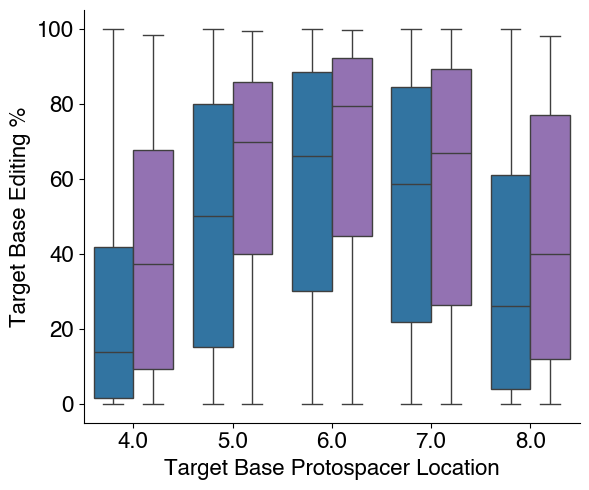

In [10]:
master_targ = pd.read_csv('master_table_unfiltered.csv')

read_cutoff = 10
m = master_targ[(master_targ['sensor_reads']>=read_cutoff) & (master_targ['classification']=='targeting guide')]

fig, ax = plt.subplots(figsize=(6,5))

sns.boxplot(data = m, x='Protospacer_Location', y='target_base_edit_perc', hue='Editor', palette=['tab:blue', 'tab:purple'], legend=False)

ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('Target Base Editing %', fontsize=16)
ax.set_xlabel('Target Base Protospacer Location', fontsize=16)
fig.tight_layout()
#fig.savefig('figures/extended4a.pdf')

In [11]:
MBES = pd.read_csv('MBESv2_CORRECTED.csv')

MBES_targ = MBES[MBES['classification']=='targeting guide']

ABE = MBES_targ[MBES_targ['Editor']=='ABE']
CBE = MBES_targ[MBES_targ['Editor']=='CBE']

ABE_guides = list(ABE['gRNA_id'])
CBE_guides = list(CBE['gRNA_id'])


k = os.listdir('ABE_editing/MLE')
names = []
dfs = []
for i in k:
    nombre = i.split('_')[0]

    aa = pd.read_csv(f'ABE_editing/MLE/{i}')
    aa = aa[aa['Guide_ID'].isin(ABE_guides)]
    names.append(nombre)
    dfs.append(aa)

ABE_mle_edit = dict(zip(names, dfs))

k = os.listdir('CBE_editing_UPDATED/MLE')

names = []
dfs = []
for i in k:
    nombre = i.split('_')[0]
    aa = pd.read_csv(f'CBE_editing_UPDATED/MLE/{i}')
    aa = aa[aa['Guide_ID'].isin(CBE_guides)]
    names.append(nombre)
    dfs.append(aa)

CBE_mle_edit = dict(zip(names, dfs))

In [12]:
#need to update and filter for sensor counts

read_cutoff = 10

d1 = dict(zip(list(ABE_mle_edit.keys()), ['INPUT', 'S', 'M', 'PLASMID', 'B', 'D5', 'D15']))


new_cols = []
reads = []
read_names = []
for i in CBE_mle_edit.keys():
    a = CBE_mle_edit[i]
    new_cols.append(a['target_base_edit_perc'])
    reads.append(a['Reads_aligned_all_amplicons'])
    read_names.append(f'reads_{i}')

names22 = [d1[i] for i in list(CBE_mle_edit.keys())]
CBE_editing = pd.DataFrame(dict(zip(names22, new_cols)))

CBE_reads = pd.DataFrame(dict(zip(read_names, reads)))
CBE_editing_combined = pd.concat([CBE_editing, CBE_reads], axis=1)
CBE_editing_filtered = CBE_editing_combined[(CBE_editing_combined['reads_input']>=read_cutoff) & (CBE_editing_combined['reads_spleen']>=read_cutoff) & (CBE_editing_combined['reads_meninges']>=read_cutoff) & (CBE_editing_combined['reads_plasmid']>=read_cutoff) & (CBE_editing_combined['reads_bonemarrow']>=read_cutoff) & (CBE_editing_combined['reads_d5']>=read_cutoff) &(CBE_editing_combined['reads_d15']>=read_cutoff)]



new_cols = []
reads = []
read_names = []
for i in ABE_mle_edit.keys():
    a = ABE_mle_edit[i]
    new_cols.append(a['target_base_edit_perc'])
    reads.append(a['Reads_aligned_all_amplicons'])
    read_names.append(f'reads_{i}')


names22 = [d1[i] for i in list(ABE_mle_edit.keys())]
ABE_editing = pd.DataFrame(dict(zip(names22, new_cols)))
ABE_reads = pd.DataFrame(dict(zip(read_names, reads)))

ABE_editing_combined = pd.concat([ABE_editing, ABE_reads], axis=1)

ABE_editing_filtered = ABE_editing_combined[(ABE_editing_combined['reads_input']>=read_cutoff) & (ABE_editing_combined['reads_spleen']>=read_cutoff) & (ABE_editing_combined['reads_meninges']>=read_cutoff) & (ABE_editing_combined['reads_plasmid']>=read_cutoff) & (ABE_editing_combined['reads_bonemarrow']>=read_cutoff) & (ABE_editing_combined['reads_d5']>=read_cutoff) &(ABE_editing_combined['reads_d15']>=read_cutoff)]
ABE_editing_filtered

,INPUT,S,M,PLASMID,B,D5,D15,reads_input,reads_spleen,reads_meninges,reads_plasmid,reads_bonemarrow,reads_d5,reads_d15
0,0.000000,4.991948,36.962025,0.0,4.191617,1.929530,13.364055,699,621,1185,121,1169,1192,868
3,0.000000,56.792688,8.047465,0.0,53.646738,22.960152,40.912969,858,4814,4635,185,8062,2108,2344
57,1.283697,39.771547,71.227197,0.0,76.371308,65.404930,65.272727,779,1926,2412,243,4977,2272,2200
91,0.410537,67.907634,94.911783,0.0,70.086207,79.592406,86.170468,2923,4244,6348,483,4640,3582,4165
102,3.708609,96.437055,90.697674,0.0,87.095658,91.070336,98.797737,2265,1263,5074,330,5781,3270,2828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,0.000000,83.435583,99.699609,0.0,94.270833,94.256259,93.638677,518,489,3329,160,960,679,786
14281,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,161,217,198,75,257,103,93
14324,1.269036,10.655738,0.439883,0.0,7.033278,4.115523,6.906615,1576,1342,1364,180,4237,2770,2056
14335,0.000000,27.673167,13.601236,0.0,14.955040,38.813283,37.428896,1140,2974,647,158,4226,1837,1758


[Text(1, 0.5, 'M'),
 Text(1, 1.5, 'S'),
 Text(1, 2.5, 'B'),
 Text(1, 3.5, 'D5'),
 Text(1, 4.5, 'D15'),
 Text(1, 5.5, 'INPUT'),
 Text(1, 6.5, 'PLASMID')]

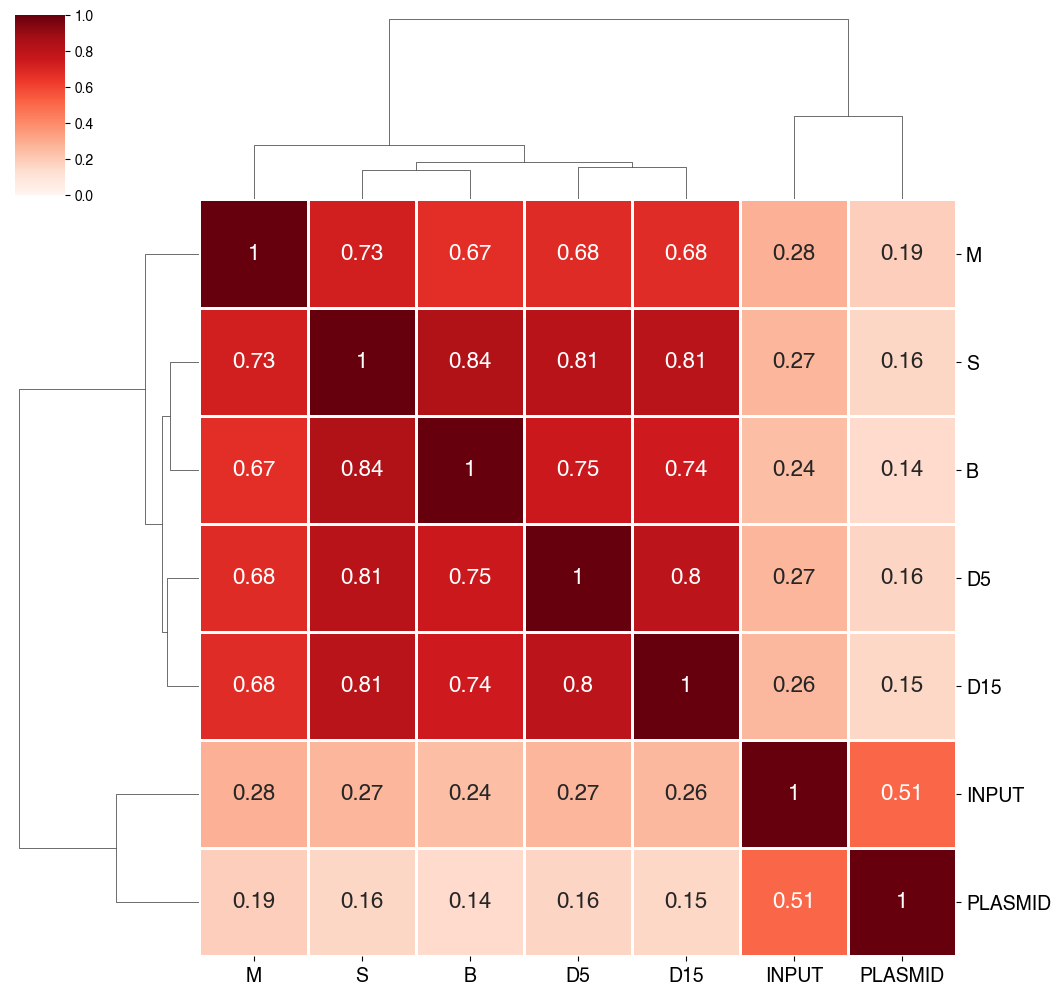

In [13]:
g = sns.clustermap(CBE_editing_filtered[names22].corr(method='pearson'), cmap='Reds', vmin=0, annot=True, linewidth=1, annot_kws={"size": 16})

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 14)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 14, rotation=0)
#g.savefig('figures/CBE_editing_heatmap.pdf')

[Text(1, 0.5, 'M'),
 Text(1, 1.5, 'D5'),
 Text(1, 2.5, 'D15'),
 Text(1, 3.5, 'S'),
 Text(1, 4.5, 'B'),
 Text(1, 5.5, 'INPUT'),
 Text(1, 6.5, 'PLASMID')]

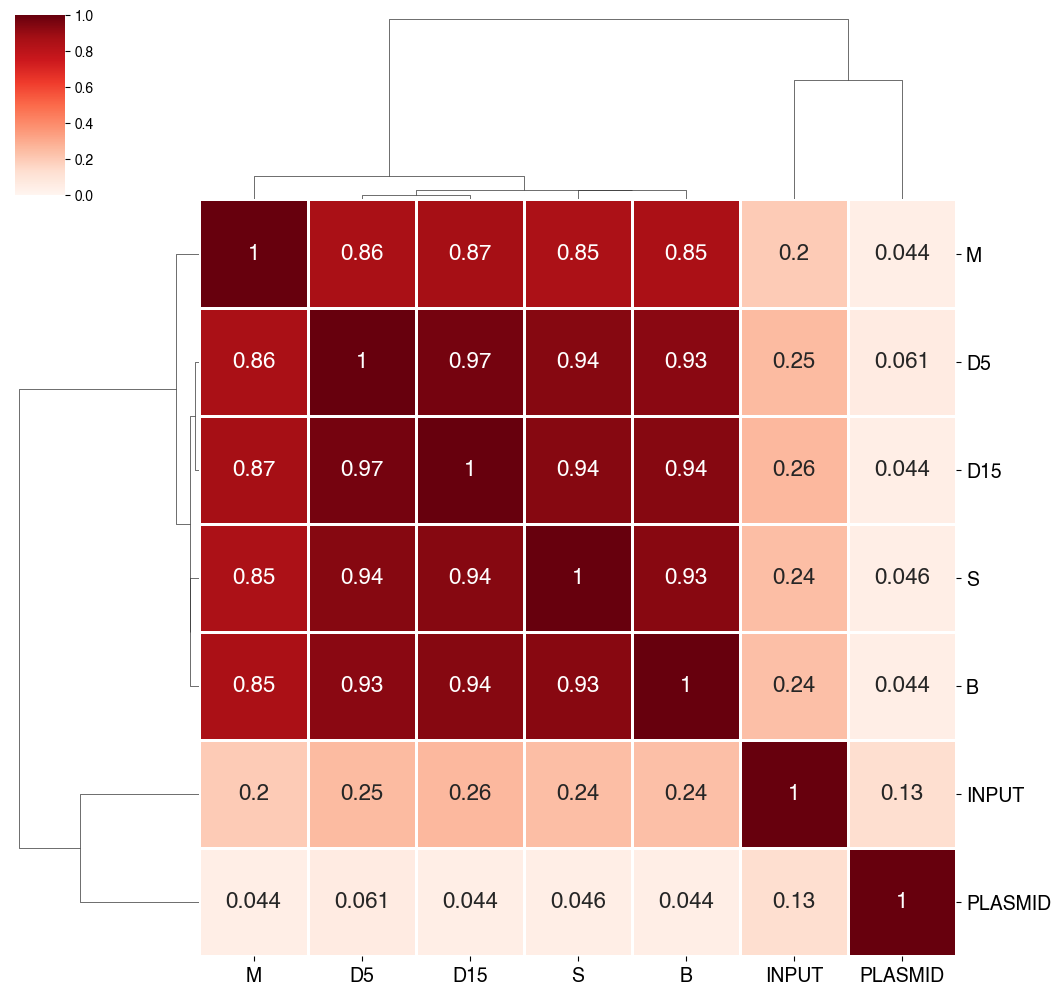

In [14]:
g = sns.clustermap(ABE_editing_filtered[names22].corr(method='pearson'), cmap='Reds', vmin=0, annot=True, linewidth=1, annot_kws={"size": 16})

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 14)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 14, rotation=0)
#g.savefig('figures/ABE_editing_heatmap.pdf')

In [15]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

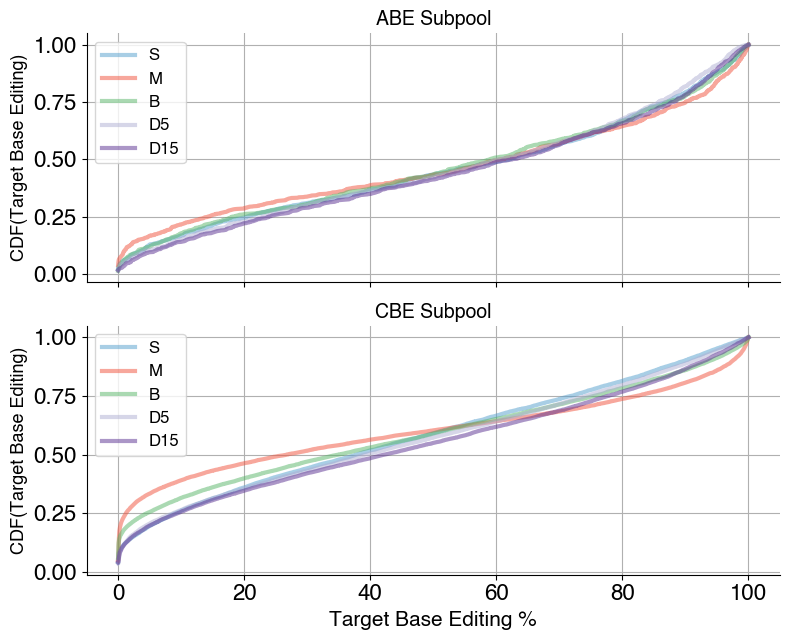

In [16]:
cs = ["#f47824", "#539ecd", "#f0513b", "#231f20", "#56b466", "#afaed3", "#582e90"]
c_dict = dict(zip(names22, cs))

fig, ax = plt.subplots(2,1,figsize=(8,6.5), sharex=True)

for i in ['S', 'M', 'B', 'D5', 'D15']:
    x,y = ecdf(ABE_editing_filtered[i])
    ax[0].plot(x,y, linewidth=3, c=c_dict[i], alpha=.5, label=i)

    x,y = ecdf(CBE_editing_filtered[i])
    ax[1].plot(x,y, linewidth=3, c=c_dict[i], alpha=.5, label=i)

ax[0].legend(fontsize=12, loc='upper left')
ax[1].legend(fontsize=12, loc='upper left')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_ylabel('CDF(Target Base Editing)', fontsize=13)
ax[1].set_ylabel('CDF(Target Base Editing)', fontsize=13)
ax[1].set_xlabel('Target Base Editing %', fontsize=15)

ax[0].set_title('ABE Subpool', fontsize=14)
ax[1].set_title('CBE Subpool', fontsize=14)
ax[1].grid()
ax[0].grid()
fig.tight_layout()
#fig.savefig('figures/editing_cdf_min10reads.pdf')
#plt.plot(x,y, linewidth=2, c="#539ecd")

# Extended Data Figure 6

## 6a-b

In [3]:
ABE_LFC_FDR = pd.read_csv('ABE_LFC_FDR_df.csv')
CBE_LFC_FDR = pd.read_csv('CBE_LFC_FDR_df.csv')


cosmic = pd.read_csv('source_data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in ABE_LFC_FDR.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

ABE_LFC_FDR['Role in Cancer']=gene_type

gene_type = []
for i, val in CBE_LFC_FDR.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

CBE_LFC_FDR['Role in Cancer']=gene_type

d15
1 Pik3r3 D11G tab:grey
2 Daxx N274S tab:purple
3 Syk N451S tab:red
4 Raf1 R391G tab:red
5 Myc T73A tab:red
6 Ret K809E tab:red
7 Erbb3 Q807R tab:red
8 Keap1 Y33H tab:blue
9 Rbm10 H777R tab:blue
10 Arid5b K1026E tab:grey
1025 Braf K638E tab:red
1026 Ctnnb1 S45P tab:red
1027 Ctcf C384R tab:blue
1028 Map2k1 F53L tab:red
1029 Ctnnb1 T41A tab:red
1030 Vhl S31P tab:blue
1031 Dis3 D479G tab:grey
1032 Ezh2 Non-coding tab:purple
1033 Arid1b S456P tab:blue
1034 Vhl N44S tab:blue
1. Pik3r3 D11G
2. Daxx N274S
3. Syk N451S
4. Raf1 R391G
5. Myc T73A
6. Ret K809E
7. Erbb3 Q807R
8. Keap1 Y33H
9. Rbm10 H777R
10. Arid5b K1026E
1025. Braf K638E
1026. Ctnnb1 S45P
1027. Ctcf C384R
1028. Map2k1 F53L
1029. Ctnnb1 T41A
1030. Vhl S31P
1031. Dis3 D479G
1032. Ezh2 Non-coding
1033. Arid1b S456P
1034. Vhl N44S
spleen
1 Ercc2 Y209C tab:blue
2 Ctnnb1 S45P tab:red
3 Ercc2 T484A tab:blue
4 Nfe2 Q286R tab:grey
5 Ep300 H350R tab:blue
6 Syk N451S tab:red
7 Raf1 R391G tab:red
8 Gata3 H281R tab:purple
9 Smad4 K506E tab

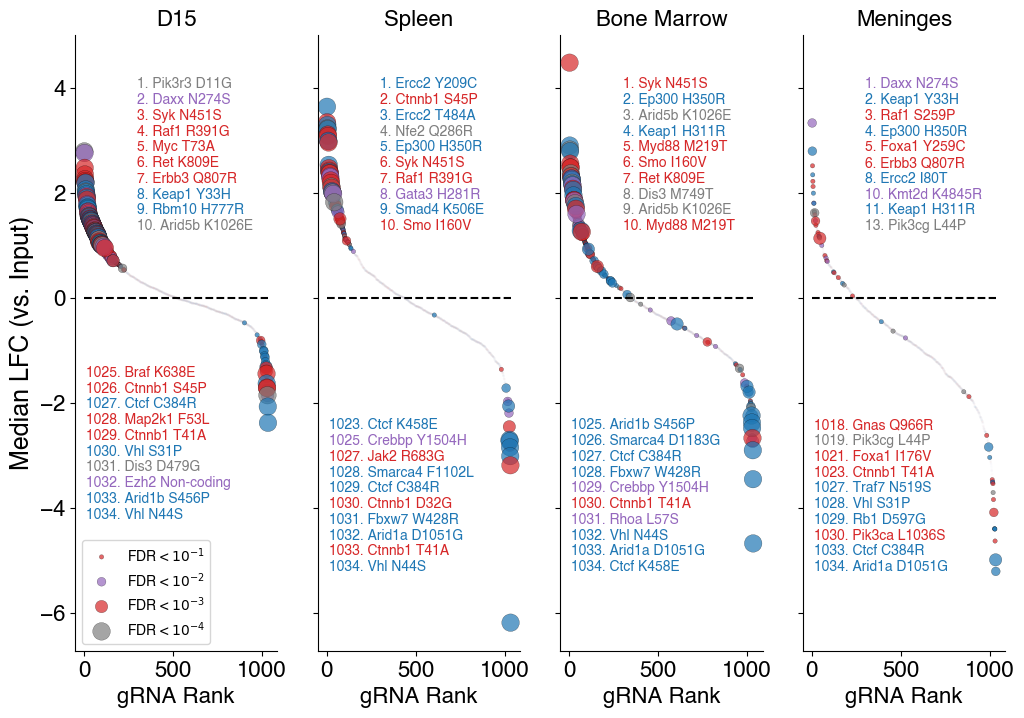

In [49]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 0
FDR_cutoff = .1
min_input_counts = 2

ABE_targ = ABE_LFC_FDR[(ABE_LFC_FDR['classification']=='targeting guide')& (ABE_LFC_FDR['target_base_edit_perc']>=min_edit) & (ABE_LFC_FDR['Input_median']>=min_input_counts)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by significance level

    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'], color=cc2_other['color'], s=1, alpha=.01)

    #FDR_cutoffs = [10**-4, 10**-3, 10**-2, 10**-1]

    FDR_cutoffs = [10**-1, 10**-2, 10**-3, 10**-4]

    size_dict = dict(zip(FDR_cutoffs, [10,40,80,160]))
    label_dict = dict(zip(FDR_cutoffs, ['FDR < $10^{-1}$', 'FDR < $10^{-2}$', 'FDR < $10^{-3}$', 'FDR < $10^{-4}$']))

   # for id1, cut in enumerate(FDR_cutoffs):
     #   if id1==0:
     #       cc2_sig = cc2[cc2[f'FDR_{val}']<cut]
            
     #   else:
     #       cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) & (cc2[f'FDR_{val}']>=FDR_cutoffs[id1-1])]

      #  ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut])

    for id1, cut in enumerate(FDR_cutoffs):
        if id1==3:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut)]
            
        else:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) &(cc2[f'FDR_{val}']>=FDR_cutoffs[id1+1])]

        ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut], linewidth=.2, edgecolor='black', alpha=.7)

    if k==0:
        ax[k].legend(loc='lower left')

    #------making plot pretty------

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    cc3 = cc2[cc2[f'FDR_{val}']<FDR_cutoff]
    top = cc3[:10]
    bottom = cc3[-10:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    ns = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        ns.append(f'{val2["Rank"]}. {b} {a}')
        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    #top

    for idx, j in enumerate(ns[:10]):
        ax[k].text(300,4-idx*.3, j, color=c[idx])
        print(f'{j}')

    for idx, j in enumerate(ns[10:]):
        if k==0:
            ax[k].text(10,-1.5 -(idx*.3), j, color=c[idx+10])
            print(f'{j}')
        else:
            ax[k].text(10,-2.5 -(idx*.3), j, color=c[idx+10])
            print(f'{j}')


    #for idx, j in enumerate(ns[5:]):
        #ax[k].text()

    #texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    #adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

#fig.savefig('figures/extended_6a_UPDATED.png', dpi=300, transparent=True)

d15
1 Kmt2b R2717C tab:grey
2 Dnmt3a P800L tab:blue
3 Tcf7l2 P392S tab:red
4 Keap1 T142M tab:blue
5 Gata2 P175L tab:red
6 Foxp1 R465H tab:red
7 Fgf3 M190I tab:grey
8 Rab35 R69H tab:grey
9 Erg R309C tab:red
10 Crebbp R482Q tab:purple
11 Tek R167W tab:grey
15 Ptprs R925C tab:grey
16 Flt3 P937L tab:red
17 Carm1 R337W tab:grey
18 Kmt2d Q3632* tab:purple
19 Stag2 Q786* tab:blue
24 Kmt2d S2130L tab:purple
34 Eif4e R112Q tab:grey
45 Ercc2 P103L tab:blue
12770 Epha5 p.D568N (H) tab:grey
1. Kmt2b R2717C
2. Dnmt3a P800L
3. Tcf7l2 P392S
4. Keap1 T142M
5. Gata2 P175L
6. Foxp1 R465H
7. Fgf3 M190I
8. Rab35 R69H
9. Erg R309C
10. Crebbp R482Q
12770. Epha5 p.D568N (H)
spleen
1 Kdm5a A1569V tab:red
2 Tek R167W tab:grey
3 Flt4 p.G1154R (H) tab:red
4 Zfhx3 A3330T tab:blue
5 Kdr V161M tab:red
6 Dnmt3c R285H tab:grey
7 Gnas R1004C tab:red
8 Brd4 E1160K tab:red
9 Keap1 R413C tab:blue
10 Insr E496K tab:grey
12761 Sesn2 R95C tab:grey
12762 Suz12 G67E tab:purple
12763 Wt1 R462Q tab:purple
12764 Spen R1004C tab:

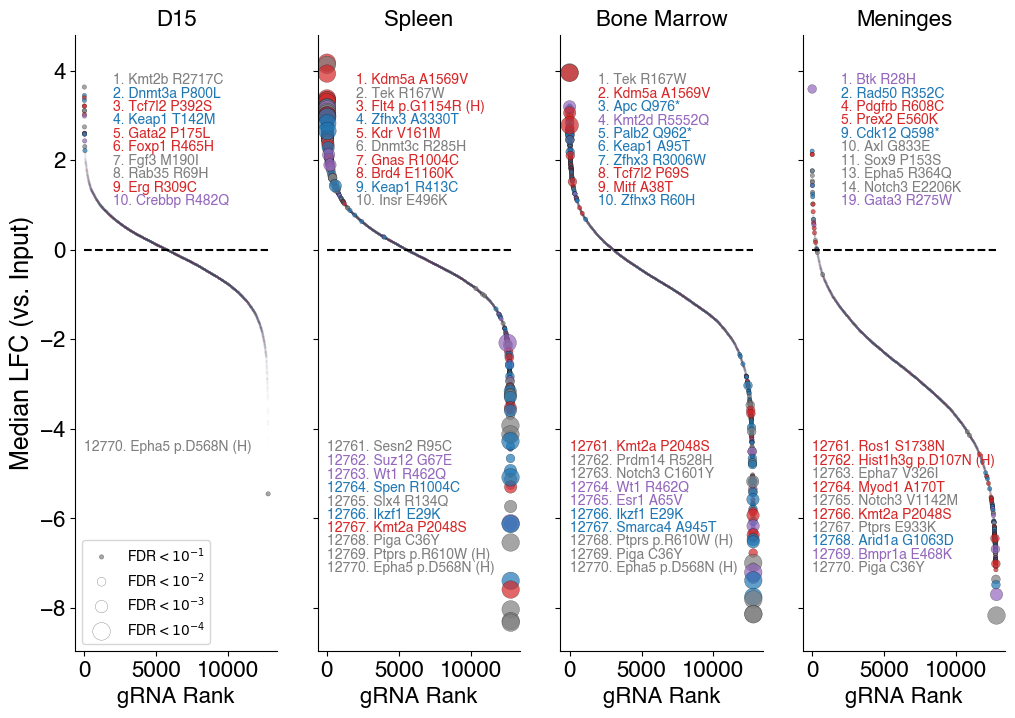

In [50]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 0
FDR_cutoff = .1
min_input_counts = 2

CBE_targ = CBE_LFC_FDR[(CBE_LFC_FDR['classification']=='targeting guide')& (CBE_LFC_FDR['target_base_edit_perc']>=min_edit) & (CBE_LFC_FDR['Input_median']>=min_input_counts)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by significance level

    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'], color=cc2_other['color'], s=1, alpha=.01)

    #FDR_cutoffs = [10**-4, 10**-3, 10**-2, 10**-1]

    FDR_cutoffs = [10**-1, 10**-2, 10**-3, 10**-4]

    size_dict = dict(zip(FDR_cutoffs, [10,40,80,160]))
    label_dict = dict(zip(FDR_cutoffs, ['FDR < $10^{-1}$', 'FDR < $10^{-2}$', 'FDR < $10^{-3}$', 'FDR < $10^{-4}$']))

   # for id1, cut in enumerate(FDR_cutoffs):
     #   if id1==0:
     #       cc2_sig = cc2[cc2[f'FDR_{val}']<cut]
            
     #   else:
     #       cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) & (cc2[f'FDR_{val}']>=FDR_cutoffs[id1-1])]

      #  ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut])

    for id1, cut in enumerate(FDR_cutoffs):
        if id1==3:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut)]
            
        else:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) &(cc2[f'FDR_{val}']>=FDR_cutoffs[id1+1])]

        ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut], linewidth=.2, edgecolor='black', alpha=.7)

    if k==0:
        ax[k].legend(loc='lower left')

    #------making plot pretty------

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    cc3 = cc2[cc2[f'FDR_{val}']<FDR_cutoff]
    top = cc3[:10]
    bottom = cc3[-10:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    ns = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (H)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        ns.append(f'{val2["Rank"]}. {b} {a}')
        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    #top
    #specific modifications for CBE
    if k==0:
        for idx, j in enumerate(ns[:10]):
            ax[k].text(2000,3.7-idx*.3, j, color=c[idx])
            print(f'{j}')

    elif k==3:
        for idx, j in enumerate(ns[:10]):
            ax[k].text(2000,3.7-idx*.3, j, color=c[idx])
            print(f'{j}')

    else: 
        for idx, j in enumerate(ns[:10]):

            ax[k].text(2000,3.7-idx*.3, j, color=c[idx])
            print(f'{j}')



    for idx, j in enumerate(ns[10:]):
        if k==0:
            if idx in [9]:
                ax[k].text(10,-4.5, j, color=c[idx+10])
                print(f'{j}')
            #ax[k].text(10,-1.5 -(idx*.3), j, color=c[idx+10])
            #print(f'{j}')
        else:
            ax[k].text(10,-4.5 -(idx*.3), j, color=c[idx+10])
            print(f'{j}')


    #for idx, j in enumerate(ns[5:]):
        #ax[k].text()

    #texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    #adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)
#fig.savefig('figures/extended_6b_UPDATED.png', dpi=300, transparent=True)

## 6c-d

d15
1 Myc T73A tab:red
2 Erbb3 Q807R tab:red
3 Keap1 Y33H tab:blue
4 Rbm10 H777R tab:blue
5 Arid5b K1026E tab:grey
6 Flt3 R848G tab:red
7 Ep300 H350R tab:blue
8 Smo I160V tab:red
9 Runx1 R149G tab:purple
10 Ptprt N470S tab:blue
78 Myd88 L252P tab:red
79 Foxo1 T24A tab:purple
81 Trp53 H176R tab:purple
82 Etv6 Non-coding tab:blue
83 Crebbp C1475R tab:purple
84 Csf3r T774A tab:red
87 Pik3cg L44P tab:grey
88 Ptpn11 D61G tab:red
184 Etv6 Y397H tab:blue
188 Vhl N44S tab:blue
1. Myc T73A
2. Erbb3 Q807R
3. Keap1 Y33H
4. Rbm10 H777R
5. Arid5b K1026E
6. Flt3 R848G
7. Ep300 H350R
8. Smo I160V
9. Runx1 R149G
10. Ptprt N470S
184. Etv6 Y397H
188. Vhl N44S
spleen
1 Ctnnb1 S45P tab:red
2 Ep300 H350R tab:blue
3 Smo I160V tab:red
4 Ret K809E tab:red
5 Smo I160V tab:red
6 Flt3 R848G tab:red
7 Lck T497A tab:red
8 Trp53 R277G tab:purple
9 Card11 S116P tab:red
10 Keap1 Y33H tab:blue
43 Nkx2-1 Y174C tab:purple
44 Igf1r D556G tab:grey
46 Rhoa Y34C tab:purple
47 Nfe2 Q286R tab:grey
50 Trp53 M243T tab:purple
17

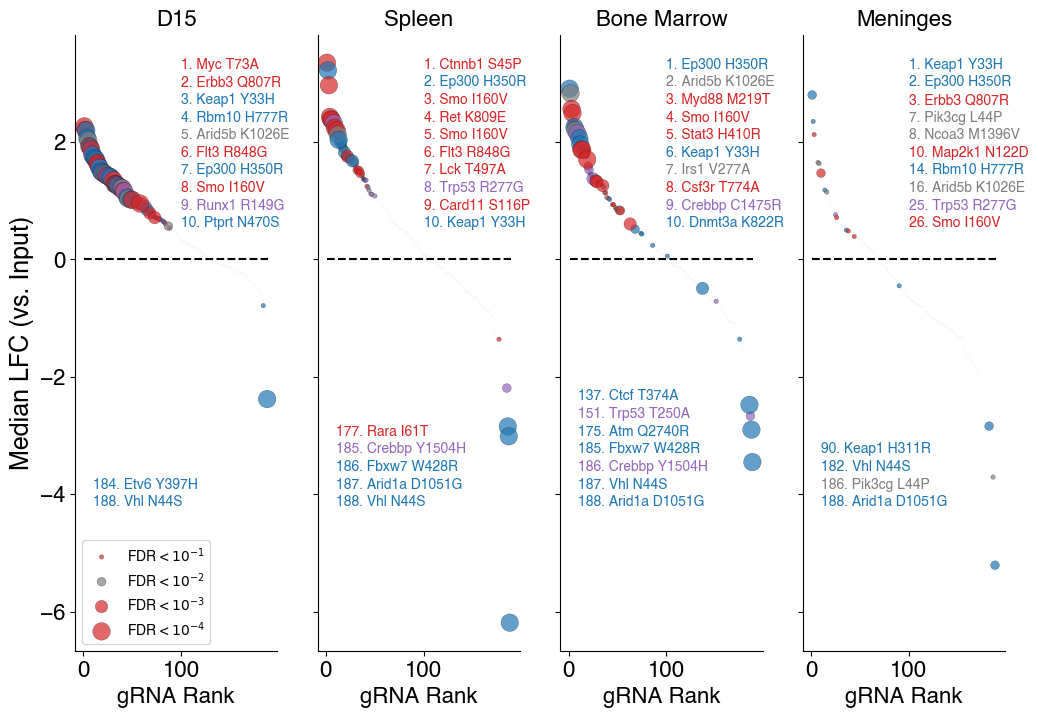

In [51]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 90
FDR_cutoff = .1
min_input_counts = 2

ABE_targ = ABE_LFC_FDR[(ABE_LFC_FDR['classification']=='targeting guide')& (ABE_LFC_FDR['target_base_edit_perc']>=min_edit) & (ABE_LFC_FDR['Input_median']>=min_input_counts)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by significance level

    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'], color=cc2_other['color'], s=1, alpha=.01)

    #FDR_cutoffs = [10**-4, 10**-3, 10**-2, 10**-1]

    FDR_cutoffs = [10**-1, 10**-2, 10**-3, 10**-4]

    size_dict = dict(zip(FDR_cutoffs, [10,40,80,160]))
    label_dict = dict(zip(FDR_cutoffs, ['FDR < $10^{-1}$', 'FDR < $10^{-2}$', 'FDR < $10^{-3}$', 'FDR < $10^{-4}$']))

   # for id1, cut in enumerate(FDR_cutoffs):
     #   if id1==0:
     #       cc2_sig = cc2[cc2[f'FDR_{val}']<cut]
            
     #   else:
     #       cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) & (cc2[f'FDR_{val}']>=FDR_cutoffs[id1-1])]

      #  ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut])

    for id1, cut in enumerate(FDR_cutoffs):
        if id1==3:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut)]
            
        else:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) &(cc2[f'FDR_{val}']>=FDR_cutoffs[id1+1])]

        ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut], linewidth=.2, edgecolor='black', alpha=.7)

    if k==0:
        ax[k].legend(loc='lower left')

    #------making plot pretty------

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    cc3 = cc2[cc2[f'FDR_{val}']<FDR_cutoff]
    top = cc3[:10]
    bottom = cc3[-10:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    ns = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        ns.append(f'{val2["Rank"]}. {b} {a}')
        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    #top

    for idx, j in enumerate(ns[:10]):
        ax[k].text(100,3.25-idx*.3, j, color=c[idx])
        print(f'{j}')

    
    if k==0:
        for idx, j in enumerate(ns[10:]):
            if idx in [8,9]:
                ax[k].text(10,-1.5 -(idx*.3), j, color=c[idx+10])
                print(f'{j}')
    if k==1:
        for idx, j in enumerate(ns[10:]):
            if idx in [5,6,7,8,9]:
                ax[k].text(10,-1.5 -(idx*.3), j, color=c[idx+10])
                print(f'{j}')

    if k==2:
        for idx, j in enumerate(ns[10:]):
            if idx in [3,4,5,6,7,8,9]:
                ax[k].text(10,-1.5 -(idx*.3), j, color=c[idx+10])
                print(f'{j}')

    if k==3:
        for idx, j in enumerate(ns[10:]):
            if idx in [6,7,8,9]:
                ax[k].text(10,-1.5 -(idx*.3), j, color=c[idx+10])
                print(f'{j}')



    #for idx, j in enumerate(ns[5:]):
        #ax[k].text()

    #texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    #adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

#fig.savefig('figures/extended_6c_UPDATED.png', dpi=300, transparent=True)

d15
1 Dnmt3a P800L tab:blue
2 Gata2 P175L tab:red
3 Crebbp R482Q tab:purple
4 Ptprs R925C tab:grey
5 Flt3 P937L tab:red
6 Kmt2d Q3632* tab:purple
7 Kmt2d S2130L tab:purple
11 Eif4e R112Q tab:grey
1 Dnmt3a P800L tab:blue
2 Gata2 P175L tab:red
3 Crebbp R482Q tab:purple
4 Ptprs R925C tab:grey
5 Flt3 P937L tab:red
6 Kmt2d Q3632* tab:purple
7 Kmt2d S2130L tab:purple
11 Eif4e R112Q tab:grey
1. Dnmt3a P800L
2. Gata2 P175L
3. Crebbp R482Q
4. Ptprs R925C
5. Flt3 P937L
6. Kmt2d Q3632*
7. Kmt2d S2130L
11. Eif4e R112Q
spleen
1 Flt4 p.G1154R (H) tab:red
2 Gnas R1004C tab:red
3 Keap1 R413C tab:blue
4 Card11 R967C tab:red
5 Ptprt E831K tab:blue
6 Ikzf1 R424H tab:blue
7 Grin2a A555T tab:blue
8 Rras2 G23S tab:red
9 Tgfbr2 D549N tab:blue
10 Tgfbr2 A380T tab:blue
1657 Ercc4 A36T tab:blue
1658 Hist1h2bm p.E77K (H) tab:grey
1659 Ikzf1 D489N tab:blue
1660 Plcg2 A393T tab:grey
1661 Arid1a A2067T tab:blue
1663 Smarca4 R1385* tab:blue
1664 Dnmt3a P800L tab:blue
1665 Smarca4 A945T tab:blue
1666 Top1 P610L tab:g

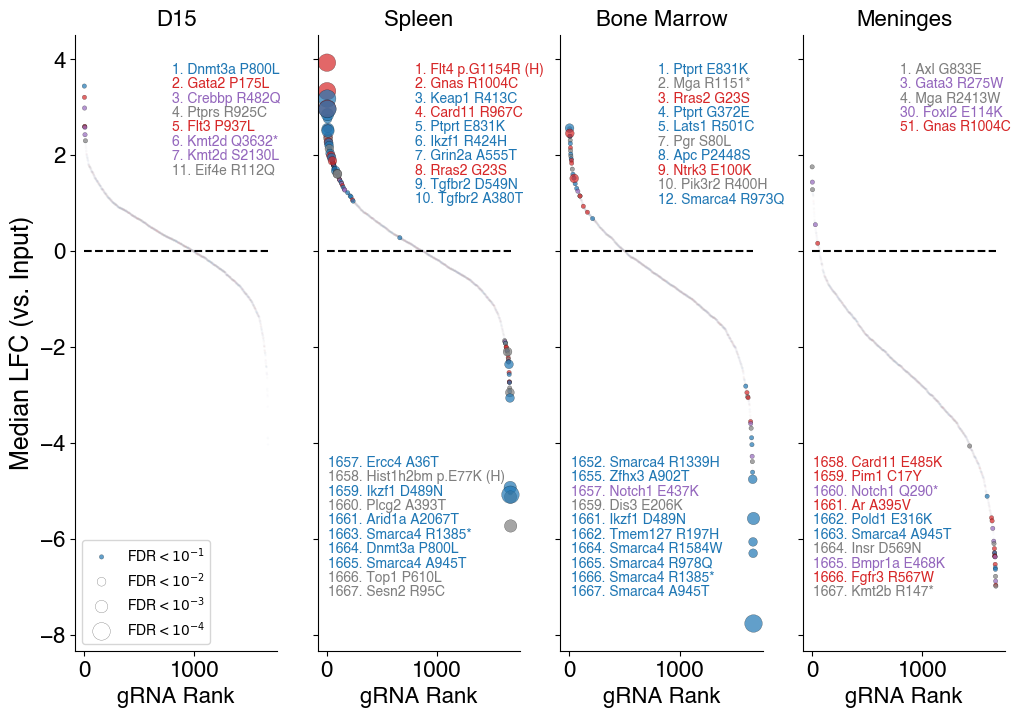

In [52]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 90
FDR_cutoff = .1
min_input_counts = 2

CBE_targ = CBE_LFC_FDR[(CBE_LFC_FDR['classification']=='targeting guide')& (CBE_LFC_FDR['target_base_edit_perc']>=min_edit) & (CBE_LFC_FDR['Input_median']>=min_input_counts)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by significance level

    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'], color=cc2_other['color'], s=1, alpha=.01)

    #FDR_cutoffs = [10**-4, 10**-3, 10**-2, 10**-1]

    FDR_cutoffs = [10**-1, 10**-2, 10**-3, 10**-4]

    size_dict = dict(zip(FDR_cutoffs, [10,40,80,160]))
    label_dict = dict(zip(FDR_cutoffs, ['FDR < $10^{-1}$', 'FDR < $10^{-2}$', 'FDR < $10^{-3}$', 'FDR < $10^{-4}$']))

   # for id1, cut in enumerate(FDR_cutoffs):
     #   if id1==0:
     #       cc2_sig = cc2[cc2[f'FDR_{val}']<cut]
            
     #   else:
     #       cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) & (cc2[f'FDR_{val}']>=FDR_cutoffs[id1-1])]

      #  ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut])

    for id1, cut in enumerate(FDR_cutoffs):
        if id1==3:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut)]
            
        else:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) &(cc2[f'FDR_{val}']>=FDR_cutoffs[id1+1])]

        ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut], linewidth=.2, edgecolor='black', alpha=.7)

    if k==0:
        ax[k].legend(loc='lower left')

    #------making plot pretty------

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    cc3 = cc2[cc2[f'FDR_{val}']<FDR_cutoff]
    top = cc3[:10]
    bottom = cc3[-10:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    ns = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (H)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        ns.append(f'{val2["Rank"]}. {b} {a}')
        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    #top
    #specific modifications for CBE
    if k==0:
        for idx, j in enumerate(ns[:8]):
            ax[k].text(800,3.7-idx*.3, j, color=c[idx])
            print(f'{j}')

    elif k==3:
        for idx, j in enumerate(ns[:5]):
            ax[k].text(800,3.7-idx*.3, j, color=c[idx])
            print(f'{j}')

    else: 
        for idx, j in enumerate(ns[:10]):

            ax[k].text(800,3.7-idx*.3, j, color=c[idx])
            print(f'{j}')



    for idx, j in enumerate(ns[10:]):
        if k==0:
            if idx in [9]:
                ax[k].text(10,-4.5, j, color=c[idx+10])
                print(f'{j}')
            #ax[k].text(10,-1.5 -(idx*.3), j, color=c[idx+10])
            #print(f'{j}')
        else:
            ax[k].text(10,-4.5 -(idx*.3), j, color=c[idx+10])
            print(f'{j}')


    #for idx, j in enumerate(ns[5:]):
        #ax[k].text()

    #texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    #adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)
#fig.savefig('figures/extended_6d_UPDATED.png', dpi=300, transparent=True)

## 6e-f

d15
1 Raf1 R391G tab:red
2 Myc T73A tab:red
3 Rbm10 H777R tab:blue
4 Flt3 R848G tab:red
5 Smo I160V tab:red
6 Runx1 R149G tab:purple
7 Smad4 L532P tab:blue
8 Rara T253A tab:red
9 Smad4 L532P tab:blue
10 Atm D2730G tab:blue
78 Mtor Y1974H tab:red
79 Crebbp C1475R tab:purple
80 Csf3r T774A tab:red
82 Kdm5c W501R tab:blue
278 Etv6 Y387C tab:blue
281 Vhl L124P tab:blue
283 Traf7 Y562C tab:blue
285 Vhl L124P tab:blue
286 Braf K638E tab:red
287 Ezh2 Non-coding tab:purple
1. Raf1 R391G
2. Myc T73A
3. Rbm10 H777R
4. Flt3 R848G
5. Smo I160V
6. Runx1 R149G
7. Smad4 L532P
8. Rara T253A
9. Smad4 L532P
10. Atm D2730G
278. Etv6 Y387C
281. Vhl L124P
283. Traf7 Y562C
285. Vhl L124P
286. Braf K638E
287. Ezh2 Non-coding
spleen
1 Nfe2 Q286R tab:grey
2 Raf1 R391G tab:red
3 Smo I160V tab:red
4 Smo I160V tab:red
5 Flt3 R848G tab:red
6 Lck T497A tab:red
7 Fgf4 R108G tab:grey
8 Rara T253A tab:red
9 Sox9 M109T tab:grey
10 Smad4 L532P tab:blue
43 Rhoa Y34C tab:purple
44 Nfe2 Q286R tab:grey
46 Trp53 M243T tab:pu

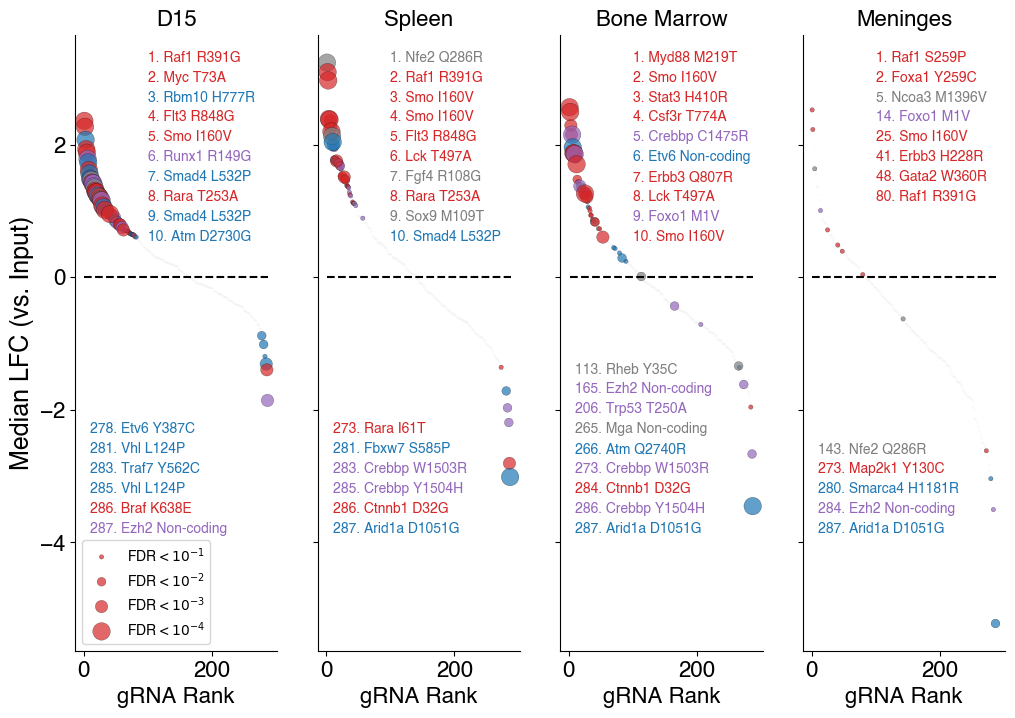

In [53]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 50
FDR_cutoff = .1
min_input_counts = 2

ABE_targ = ABE_LFC_FDR[(ABE_LFC_FDR['classification']=='targeting guide')& (ABE_LFC_FDR['corr_perc']>=min_edit) & (ABE_LFC_FDR['Input_median']>=min_input_counts)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by significance level

    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'], color=cc2_other['color'], s=1, alpha=.01)

    #FDR_cutoffs = [10**-4, 10**-3, 10**-2, 10**-1]

    FDR_cutoffs = [10**-1, 10**-2, 10**-3, 10**-4]

    size_dict = dict(zip(FDR_cutoffs, [10,40,80,160]))
    label_dict = dict(zip(FDR_cutoffs, ['FDR < $10^{-1}$', 'FDR < $10^{-2}$', 'FDR < $10^{-3}$', 'FDR < $10^{-4}$']))

   # for id1, cut in enumerate(FDR_cutoffs):
     #   if id1==0:
     #       cc2_sig = cc2[cc2[f'FDR_{val}']<cut]
            
     #   else:
     #       cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) & (cc2[f'FDR_{val}']>=FDR_cutoffs[id1-1])]

      #  ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut])

    for id1, cut in enumerate(FDR_cutoffs):
        if id1==3:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut)]
            
        else:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) &(cc2[f'FDR_{val}']>=FDR_cutoffs[id1+1])]

        ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut], linewidth=.2, edgecolor='black', alpha=.7)

    if k==0:
        ax[k].legend(loc='lower left')

    #------making plot pretty------

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    cc3 = cc2[cc2[f'FDR_{val}']<FDR_cutoff]
    top = cc3[:10]
    bottom = cc3[-10:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    ns = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        ns.append(f'{val2["Rank"]}. {b} {a}')
        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    #top    
    if k==0:
        for idx, j in enumerate(ns[:10]):

            ax[k].text(100,3.25-idx*.3, j, color=c[idx])
            print(f'{j}')

        for idx, j in enumerate(ns[10:]):
            if idx in [4,5,6,7,8,9]:
                ax[k].text(10,-1.15 -(idx*.3), j, color=c[idx+10])
                print(f'{j}')
    if k==1:
        for idx, j in enumerate(ns[:10]):

            ax[k].text(100,3.25-idx*.3, j, color=c[idx])
            print(f'{j}')

        for idx, j in enumerate(ns[10:]):
            if idx in [4,5,6,7,8,9]:
                ax[k].text(10,-1.15 -(idx*.3), j, color=c[idx+10])
                print(f'{j}')

    if k==2:
        for idx, j in enumerate(ns[:10]):

            ax[k].text(100,3.25-idx*.3, j, color=c[idx])
            print(f'{j}')

        for idx, j in enumerate(ns[10:]):
            if idx in [1,2,3,4,5,6,7,8,9]:
                ax[k].text(10,-1.15 -(idx*.3), j, color=c[idx+10])
                print(f'{j}')

    if k==3:
        for idx, j in enumerate(ns[:8]):

            ax[k].text(100,3.25-idx*.3, j, color=c[idx])
            print(f'{j}')

        for idx, j in enumerate(ns[10:]):
            if idx in [5,6,7,8,9]:
                ax[k].text(10,-1.15 -(idx*.3), j, color=c[idx+10])
                print(f'{j}')



    #for idx, j in enumerate(ns[5:]):
        #ax[k].text()

    #texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    #adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)
#fig.savefig('figures/extended_6e_UPDATED.png', dpi=300, transparent=True)

d15
spleen
1 Ptprt E1037K tab:blue
2 Tgfbr2 D549N tab:blue
3 Tgfbr2 R338W tab:blue
4 Notch3 R2150C tab:grey
5 Grin2a P1366S tab:blue
6 Inpp4a R938Q tab:grey
8 Axin2 R339H tab:blue
9 Erbb3 R1306H tab:red
10 Dnmt3a R179Q tab:blue
11 Fbxw7 Q309* tab:blue
597 Card11 R292H tab:red
598 Pik3cg Q710* tab:grey
599 Kmt2b R147* tab:grey
602 Dis3 E206K tab:grey
603 Smarca4 D715N tab:blue
605 Pik3r3 H271Y tab:grey
607 Setdb1 E714K tab:red
608 Arid1a A2067T tab:blue
610 Smarca4 R1385* tab:blue
611 Smarca4 A945T tab:blue
1. Ptprt E1037K
2. Tgfbr2 D549N
3. Tgfbr2 R338W
4. Notch3 R2150C
5. Grin2a P1366S
6. Inpp4a R938Q
8. Axin2 R339H
9. Erbb3 R1306H
10. Dnmt3a R179Q
11. Fbxw7 Q309*
597. Card11 R292H
598. Pik3cg Q710*
599. Kmt2b R147*
602. Dis3 E206K
603. Smarca4 D715N
605. Pik3r3 H271Y
607. Setdb1 E714K
608. Arid1a A2067T
610. Smarca4 R1385*
611. Smarca4 A945T
bonemarrow
4 Notch3 R2150C tab:grey
26 Notch2 R2402* tab:purple
591 Ctnnb1 S33F tab:red
600 Ncor1 A703T tab:blue
606 Notch1 E437K tab:purple
607

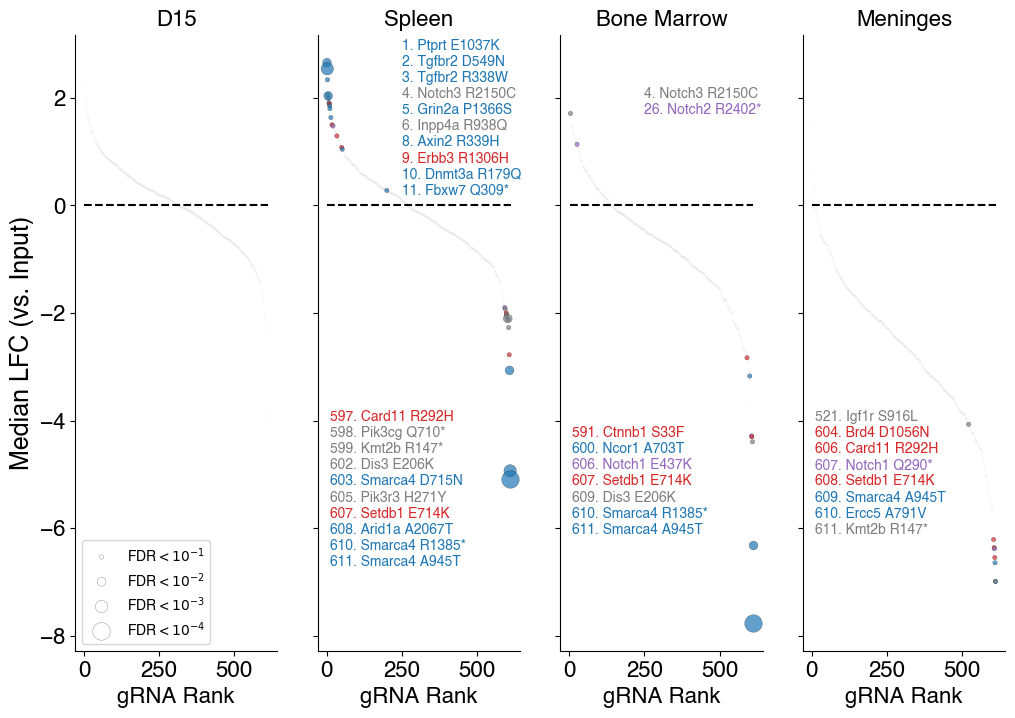

In [54]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 50
FDR_cutoff = .1
min_input_counts = 2

CBE_targ = CBE_LFC_FDR[(CBE_LFC_FDR['classification']=='targeting guide')& (CBE_LFC_FDR['corr_perc']>=min_edit) & (CBE_LFC_FDR['Input_median']>=min_input_counts)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by significance level

    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'], color=cc2_other['color'], s=1, alpha=.01)

    #FDR_cutoffs = [10**-4, 10**-3, 10**-2, 10**-1]

    FDR_cutoffs = [10**-1, 10**-2, 10**-3, 10**-4]

    size_dict = dict(zip(FDR_cutoffs, [10,40,80,160]))
    label_dict = dict(zip(FDR_cutoffs, ['FDR < $10^{-1}$', 'FDR < $10^{-2}$', 'FDR < $10^{-3}$', 'FDR < $10^{-4}$']))

   # for id1, cut in enumerate(FDR_cutoffs):
     #   if id1==0:
     #       cc2_sig = cc2[cc2[f'FDR_{val}']<cut]
            
     #   else:
     #       cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) & (cc2[f'FDR_{val}']>=FDR_cutoffs[id1-1])]

      #  ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut])

    for id1, cut in enumerate(FDR_cutoffs):
        if id1==3:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut)]
            
        else:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) &(cc2[f'FDR_{val}']>=FDR_cutoffs[id1+1])]

        ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut], linewidth=.2, edgecolor='black', alpha=.7)

    if k==0:
        ax[k].legend(loc='lower left')

    #------making plot pretty------

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    cc3 = cc2[cc2[f'FDR_{val}']<FDR_cutoff]
    top = cc3[:10]
    bottom = cc3[-10:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    ns = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (H)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        ns.append(f'{val2["Rank"]}. {b} {a}')
        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    #top
    #specific modifications for CBE
    #top    
    if k==1:
        for idx, j in enumerate(ns[:10]):

            ax[k].text(250,2.9-idx*.3, j, color=c[idx])
            print(f'{j}')

        for idx, j in enumerate(ns[10:]):
            ax[k].text(10,-4 -(idx*.3), j, color=c[idx+10])
            print(f'{j}')

    if k==2:
        for idx, j in enumerate(ns[:10]):
            if idx in [0,1]:
                ax[k].text(250,2-idx*.3, j, color=c[idx])
                print(f'{j}')

        for idx, j in enumerate(ns[10:]):
            if idx in [1,2,3,4,5,6,7,8,9]:
                ax[k].text(10,-4 -(idx*.3), j, color=c[idx+10])
                print(f'{j}')

    if k==3:

        for idx, j in enumerate(ns[8:]):
            #if idx in [5,6,7,8,9]:
            ax[k].text(10,-4 -(idx*.3), j, color=c[idx])
            print(f'{j}')


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

#fig.savefig('figures/extended_6f_UPDATED.png', dpi=300, transparent=True)

# Extended Data Figure 8

In [130]:
ABE_LFC = pd.read_csv('ABE_LFC_FDR_df.csv')
CBE_LFC = pd.read_csv('CBE_LFC_FDR_df.csv')

LFC_comb = pd.concat((ABE_LFC, CBE_LFC))

lfc_table = LFC_comb[['gRNA_id', 'LFC_median_d15', 'LFC_median_spleen', 'LFC_median_bonemarrow', 'LFC_median_meninges', 'classification']].reset_index(drop=True)

master_targ = lfc_table[lfc_table['classification']=='targeting guide']

master_targ[:10]

,gRNA_id,LFC_median_d15,LFC_median_spleen,LFC_median_bonemarrow,LFC_median_meninges,classification
0,gRNA_1,-0.248177,-1.077769,-0.946780,-1.650615,targeting guide
1,gRNA_2,-0.889060,1.434236,1.495161,1.249886,targeting guide
2,gRNA_3,0.805668,-0.234645,0.058057,-0.225601,targeting guide
3,gRNA_67,-0.081705,0.626383,-0.115554,-0.946669,targeting guide
4,gRNA_84,0.314231,0.039434,-0.393134,-2.498806,targeting guide
5,gRNA_85,-0.160383,-0.030999,1.885135,-1.336062,targeting guide
6,gRNA_95,0.712334,0.584339,0.045940,-3.052046,targeting guide
7,gRNA_120,0.686780,1.058570,0.802169,0.312272,targeting guide
8,gRNA_121,0.836765,-0.420227,-0.253033,1.173511,targeting guide
9,gRNA_122,0.135460,-0.278195,-0.397591,-0.517897,targeting guide


In [135]:
def function_example(master_targ):

    master_targ['new_Column'] = 3

    return master_targ

function_example(master_targ)

,gRNA_id,LFC_median_d15,LFC_median_spleen,LFC_median_bonemarrow,LFC_median_meninges,classification,new_Column
0,gRNA_1,-0.248177,-1.077769,-0.946780,-1.650615,targeting guide,3
1,gRNA_2,-0.889060,1.434236,1.495161,1.249886,targeting guide,3
2,gRNA_3,0.805668,-0.234645,0.058057,-0.225601,targeting guide,3
3,gRNA_67,-0.081705,0.626383,-0.115554,-0.946669,targeting guide,3
4,gRNA_84,0.314231,0.039434,-0.393134,-2.498806,targeting guide,3
...,...,...,...,...,...,...,...
14307,gRNA_14408,-0.464569,-2.425713,-2.048126,-2.594527,targeting guide,3
14308,gRNA_14409,0.297399,0.617171,0.204029,-1.634526,targeting guide,3
14309,gRNA_14410,-0.022546,-1.308803,-1.688895,-3.090144,targeting guide,3
14310,gRNA_14411,0.441562,0.432193,-0.651467,-2.776937,targeting guide,3


In [ ]:
import sc

In [133]:
master_targ.sort_values(by='LFC_median_spleen', ascending=True)[['gRNA_id']]

,gRNA_id
13876,gRNA_13977
14173,gRNA_14274
9116,gRNA_8730
6728,gRNA_6199
5891,gRNA_5306
...,...
11878,gRNA_11704
6395,gRNA_5841
4971,gRNA_4333
10739,gRNA_10454


In [126]:
g_list = [['gRNA_12301',
  'gRNA_1840',
  'gRNA_3670',
  'gRNA_8831',
  'gRNA_2401',
  'gRNA_6745',
  'gRNA_3570'],
 ['gRNA_13064',
  'gRNA_7807',
  'gRNA_2051',
  'gRNA_2',
  'gRNA_10211',
  'gRNA_3233',
  'gRNA_3238',
  'gRNA_10757',
  'gRNA_3765',
  'gRNA_631',
  'gRNA_10312',
  'gRNA_1086',
  'gRNA_2295',
  'gRNA_2524',
  'gRNA_3742',
  'gRNA_4578',
  'gRNA_677',
  'gRNA_14337',
  'gRNA_9020',
  'gRNA_1765',
  'gRNA_1592',
  'gRNA_4105'],
 ['gRNA_5054',
  'gRNA_2218',
  'gRNA_5978',
  'gRNA_7652',
  'gRNA_10884',
  'gRNA_1719',
  'gRNA_7038',
  'gRNA_13228',
  'gRNA_949',
  'gRNA_3136',
  'gRNA_7502',
  'gRNA_7709']]


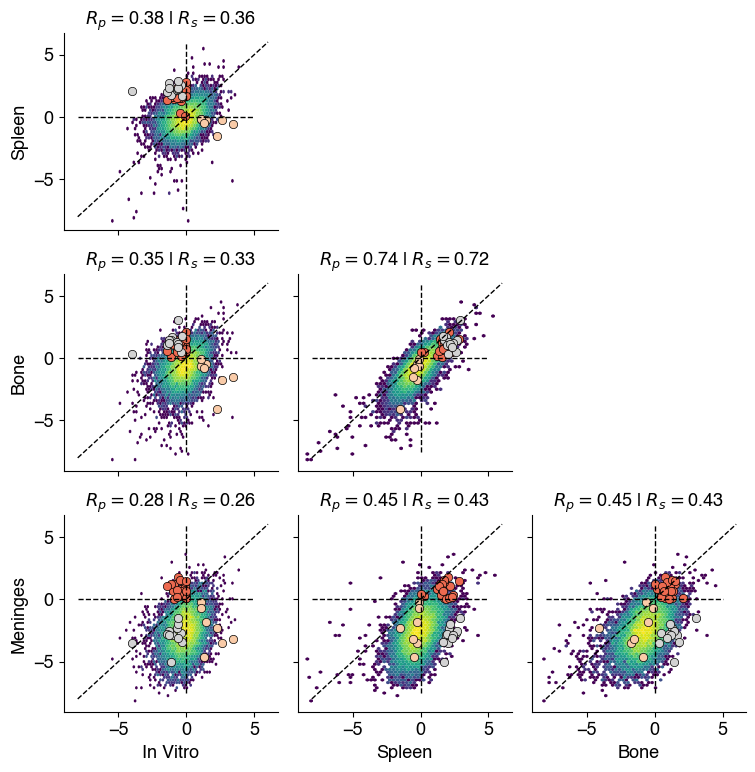

In [128]:
samples = ['LFC_median_d15', 'LFC_median_spleen', 'LFC_median_bonemarrow', 'LFC_median_meninges']

fig, ax = plt.subplots(4,4,figsize=(10,10), sharex=True, sharey=True)

palette = ['#F9CBA8', '#ED6A50', 'lightgrey', 'darkslategray']


s_dict = {'LFC_median_d15': 'In Vitro', 'LFC_median_spleen': 'Spleen', 'LFC_median_bonemarrow': 'Bone', 'LFC_median_meninges': 'Meninges'}
for idx, samp in enumerate(samples):

    row = idx
    for idx2, samp2 in enumerate(samples):
        col = idx2
        ax[row][col].hexbin(master_targ[samp2], master_targ[samp], bins='log', gridsize=50, linewidth=0)

        ax[row][col].plot([0,0],[-7.5,6], linestyle='dashed', color='black', linewidth=1)
        ax[row][col].plot([-8,5],[0,0], linestyle='dashed', color='black', linewidth=1)
        ax[row][col].plot([-8,6],[-8,6], linestyle='dashed', color='black', linewidth=1)

        ax[row][0].set_ylabel(s_dict[samp], fontsize=13)
        ax[3][col].set_xlabel(s_dict[samp2], fontsize=13)
    #ax[idx//3][idx%3].set_xticklabels(['S', 'B', 'M'])
    #ax[idx//3][idx%3].set_yticklabels(['IV', 'S', 'B',])
    #ax[idx//3][idx%3].set_title(f'{gene}', fontsize=12)

        ax[row][col].spines[['top', 'right']].set_visible(False)

        ax[row][col].tick_params(axis='both', which='major', labelsize=13,)

        spear = np.round(scipy.stats.spearmanr(master_targ[samp2], master_targ[samp]).statistic, 2)
        pear = np.round(scipy.stats.pearsonr(master_targ[samp2], master_targ[samp]).statistic, 2)

        ax[row][col].set_title('$R_{p} = $' + f'{pear}' + ' | $R_{s} = $' + f'{spear}', fontsize=13)
        #and also add scatter plot points
        for idx3, k in enumerate(g_list):
            #gene_of_interest = embedded[lfc_table[lfc_table['gRNA_id'].isin(k)].index]

            gene_of_interest = master_targ[master_targ['gRNA_id'].isin(k)]

            ax[row][col].scatter(list(gene_of_interest[samp2]), list(gene_of_interest[samp]),  alpha=1, color=palette[idx3], edgecolor='black', linewidth=.5)


fig.delaxes(ax[0][0])
fig.delaxes(ax[0][1])
fig.delaxes(ax[0][2])
fig.delaxes(ax[0][3])
fig.delaxes(ax[1][1])
fig.delaxes(ax[1][2])
fig.delaxes(ax[1][3])
fig.delaxes(ax[2][2])
fig.delaxes(ax[2][3])
fig.delaxes(ax[3][3])

fig.tight_layout()

#fig.savefig('figures/extended_8_corr_UPDATE2.pdf', transparent=True)

# Extended Data Figure 7

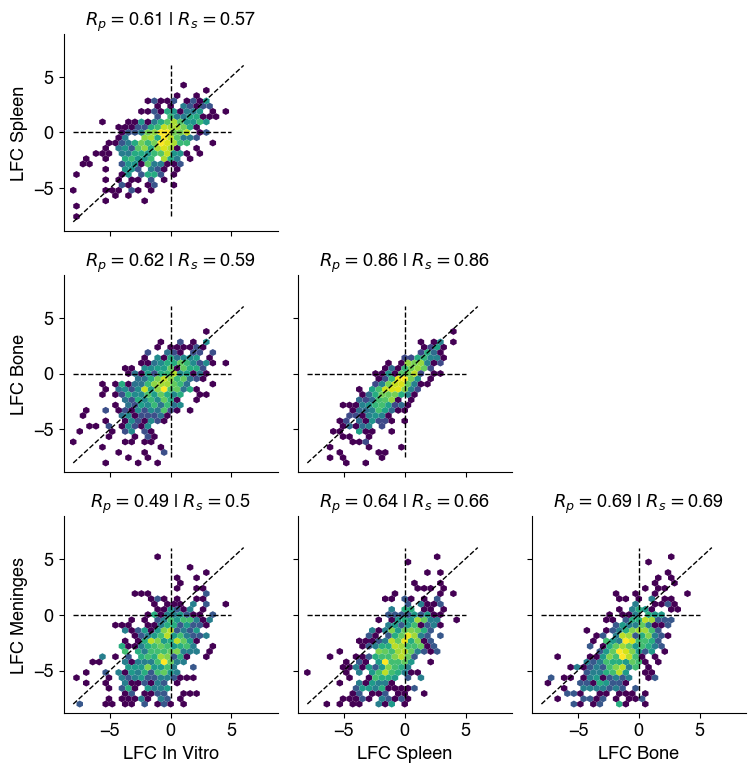

In [71]:
KO = pd.read_csv('KO_LFC_FDR.csv')
KO = KO[KO['Input_median']>=100]

samples = ['LFC_median_d15', 'LFC_median_spleen', 'LFC_median_bonemarrow', 'LFC_median_meninges']

fig, ax = plt.subplots(4,4,figsize=(10,10), sharex=True, sharey=True)

palette = ['#F9CBA8', '#ED6A50', '#7284A1', 'lightgrey', 'darkslategray']


s_dict = {'LFC_median_d15': 'LFC In Vitro', 'LFC_median_spleen': 'LFC Spleen', 'LFC_median_bonemarrow': 'LFC Bone', 'LFC_median_meninges': 'LFC Meninges'}
for idx, samp in enumerate(samples):

    row = idx
    for idx2, samp2 in enumerate(samples):
        col = idx2
        ax[row][col].hexbin(KO[samp2], KO[samp], bins='log', gridsize=30, linewidth=0, extent = (-8, 8, -8, 8))

        ax[row][col].plot([0,0],[-7.5,6], linestyle='dashed', color='black', linewidth=1)
        ax[row][col].plot([-8,5],[0,0], linestyle='dashed', color='black', linewidth=1)
        ax[row][col].plot([-8,6],[-8,6], linestyle='dashed', color='black', linewidth=1)

        ax[row][0].set_ylabel(s_dict[samp], fontsize=13)
        ax[3][col].set_xlabel(s_dict[samp2], fontsize=13)
    #ax[idx//3][idx%3].set_xticklabels(['S', 'B', 'M'])
    #ax[idx//3][idx%3].set_yticklabels(['IV', 'S', 'B',])
    #ax[idx//3][idx%3].set_title(f'{gene}', fontsize=12)

        ax[row][col].spines[['top', 'right']].set_visible(False)

        ax[row][col].tick_params(axis='both', which='major', labelsize=13,)

        spear = np.round(scipy.stats.spearmanr(KO[samp2], KO[samp]).statistic, 2)
        pear = np.round(scipy.stats.pearsonr(KO[samp2], KO[samp]).statistic, 2)

        ax[row][col].set_title('$R_{p} = $' + f'{pear}' + ' | $R_{s} = $' + f'{spear}', fontsize=13)
  

fig.delaxes(ax[0][0])
fig.delaxes(ax[0][1])
fig.delaxes(ax[0][2])
fig.delaxes(ax[0][3])
fig.delaxes(ax[1][1])
fig.delaxes(ax[1][2])
fig.delaxes(ax[1][3])
fig.delaxes(ax[2][2])
fig.delaxes(ax[2][3])
fig.delaxes(ax[3][3])

fig.tight_layout()
#fig.savefig('figures/extended_fig_KO_correlations_UPDATED.pdf', transparent=True)

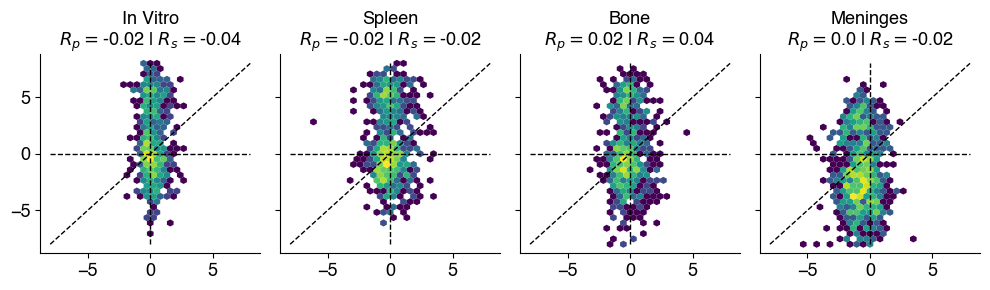

In [77]:
BE = pd.read_csv('ABE_LFC_FDR_df.csv')
BE = BE[(BE['classification']=='targeting guide') & (BE['target_base_edit_perc']>=20)]
KO = pd.read_csv('KO_LFC_FDR.csv').rename(columns = {'sgrna':'gRNA_id', 'LFC_median_d15':'LFC_median_d15_KO', 'LFC_median_spleen':'LFC_median_spleen_KO', 'LFC_median_bonemarrow':'LFC_median_bonemarrow_KO', 'LFC_median_meninges':'LFC_median_meninges_KO'})

merged = pd.merge(KO, BE, on='gRNA_id')

samples_KO = ['LFC_median_d15_KO', 'LFC_median_spleen_KO', 'LFC_median_bonemarrow_KO', 'LFC_median_meninges_KO']
samples_BE = ['LFC_median_d15', 'LFC_median_spleen', 'LFC_median_bonemarrow', 'LFC_median_meninges']
names = ['In Vitro', 'Spleen', 'Bone', "Meninges"]

fig, ax = plt.subplots(1,4,figsize=(10,3), sharex=True, sharey=True)

for i in range(4):

    ax[i].hexbin(merged[samples_BE[i]], merged[samples_KO[i]], bins='log', gridsize=30, linewidth=0, extent = (-8, 8, -8, 8))
    ax[i].plot([0,0],[-8,8], linestyle='dashed', color='black', linewidth=1)
    ax[i].plot([-8,8],[0,0], linestyle='dashed', color='black', linewidth=1)
    ax[i].plot([-8,8],[-8,8], linestyle='dashed', color='black', linewidth=1)
    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=13,)

    spear = np.round(scipy.stats.spearmanr(merged[samples_BE[i]], merged[samples_KO[i]]).statistic, 2)
    pear = np.round(scipy.stats.pearsonr(merged[samples_BE[i]], merged[samples_KO[i]]).statistic, 2)

    ax[i].set_title(f'{names[i]}\n' + '$R_{p} = $' + f'{pear}' + ' | $R_{s} = $' + f'{spear}', fontsize=13)

    #ax[i].set_title(names[i], fontsize=14)
    
fig.tight_layout()
fig.savefig('figures/extended_BE_vs_KO_UPDATED.pdf', transparent=True)

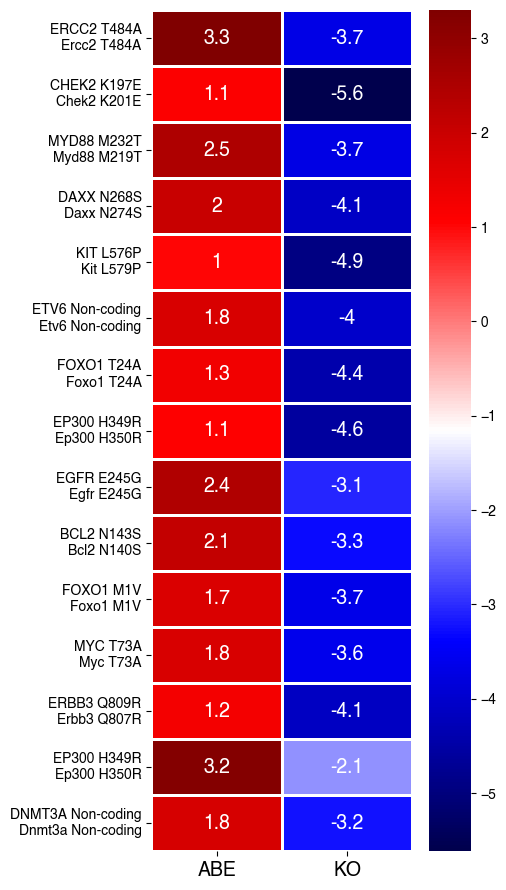

In [108]:
#and compare top vs. bottom hits for some gRNAs in the spleen

delta = merged['LFC_median_spleen'] - merged['LFC_median_spleen_KO']
merged['delta_spleen'] = delta


merged2 = merged[merged['Input_median_x']>=100]
a0 = merged2[merged2['LFC_median_spleen']>=1]
a1 = a0.sort_values(by='delta_spleen', ascending=False)[:15]

fig, ax = plt.subplots(figsize=(5,9))


g = sns.heatmap(a1[['LFC_median_spleen', 'LFC_median_spleen_KO']], cmap='seismic', annot=True, annot_kws={'size':14}, linewidth=1, edgecolor='white')

name = []

for i, val in a1.iterrows():
    a = val['gene_name_h_x']
    b = val['HGVSp_h_x']
    c = val['gene_name_m_corrected_x']
    d = val['HGVSp_m_x']

    if type(b) != str:
        b = 'Non-coding'

    n = f'{a} {b}\n{c} {d}'
    name.append(n)

g.set_yticklabels(name, rotation=0)
g.set_xticklabels(['ABE', 'KO'], rotation=0, fontsize=14)
fig.tight_layout()

#fig.savefig('figures/heatmap_extended_KO_v_ABE.pdf', transparent=True)